<span style="font-size: 36px;"><strong>Đồ án cuối kỳ: Global Cost of Living</strong></span>

# <strong>A. Thu thập dữ liệu</strong>

### 1. Chủ đề và nguồn thu thập dữ liệu

**Chủ đề:** Dataset này liên quan đến Chi phí sinh hoạt ở các thành phố trên toàn thế giới. Nó cung cấp thông tin chi tiết về giá cả của nhiều loại hàng hóa và dịch vụ khác nhau tại 5000 thành phố, giúp phân tích mức độ chi phí sinh hoạt tại các khu vực khác nhau. 

**Nguồn thu thập dữ liệu:** [Numbeo](https://www.numbeo.com)

### 2. License và Copyright

Trong [Terms of Use - Numbeo.com](https://www.numbeo.com/common/terms_of_use.jsp) có đoạn *"Use of Numbeo data **is free for personal use**, under the term if you use Numbeo data in personal blogging, websites and social media that you have to give appropriate credit, a link back to Numbeo.com."* và *"Use, reuse, and distribution of Numbeo's content in newspapers, journals, books, radio broadcasting, TV broadcasting, and academic usages (such as thesis and journal articles) **are allowed** under this or other licenses, under the term that if you reuse our data, you must give appropriate credit. Appropriate credit is a link back to Numbeo.com or a reference format in journal articles and books."* nên bộ dữ liệu này **có thể được sử dụng cho mục đích cá nhân hoặc cho mục đích học thuật với điều kiện người sử dụng có trích dẫn nguồn đầy đủ.**

### 3. Cách tác giả thu thập dữ liệu

Theo [Methodology and Motivation](https://www.numbeo.com/common/motivation_and_methodology.jsp) của [Numbeo](https://www.numbeo.com/), dữ liệu về chi phí sinh hoạt trên toàn cầu được thu thập thông qua biểu mẫu trực tuyến do người dùng tự nguyện cung cấp thông tin, kết hợp thông tin từ người dùng và các nguồn đáng tin cậy (chính phủ, siêu thị, công ty taxi). Người dùng cung cấp thông tin chi tiết về các nhóm chi phí như nhà hàng (**Restaurants**), chợ (**Markets**), giao thông (**Transportation**), tiện ích hàng tháng (**Utilities (Monthly)**), thể thao và giải trí (**Sports And Leisure**), chăm sóc trẻ em (**Childcare**), quần áo và giày dép (**Clothing And Shoes**), tiền thuê nhà hàng tháng (**Rent Per Month**), giá mua căn hộ (**Buy Apartment Price**), cũng như mức lương và tài chính (**Salaries And Financing**). Phương pháp này cho phép Numbeo xây dựng cơ sở dữ liệu phong phú và toàn diện, phản ánh chính xác mức sống tại nhiều khu vực trên thế giới.

Xem thêm biểu mẫu dùng để thu thập thông tin tại [đây](https://www.numbeo.com/common/form.jsp?country=Vietnam&city=Ho+Chi+Minh+City&currency=VND)

# <strong>B. Khám phá và tiền xử lý dữ liệu</strong>

#### Các thư viện cần thiết

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from textwrap import wrap
import json
import textwrap
import plotly.graph_objects as go
import math
import matplotlib.gridspec as gridspec
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Patch


pd.set_option('display.max_columns', None) 

#### Đọc dữ liệu

In [2]:
df = pd.read_csv('./data/cost-of-living_v2.csv')
df.head()

df = df[df['data_quality'] == 1]
# df = df.dropna()

#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
df.shape

(923, 58)

**Nhận xét:** Dữ liệu từ `cost-of-living_v2.csv` có 4956 dòng và 58 cột.

#### Ý nghĩa của mỗi dòng

In [4]:
df.sample(1)

city country    x1     x2    x3    x4    x5   x6    x7    x8   x9  \
1750  Aydin  Turkey  2.82  13.42  2.79  1.61  2.15  1.4  0.59  0.18  0.6   

       x10   x11   x12   x13   x14   x15   x16   x17   x18   x19  x20   x21  \
1750  0.36  0.94  1.09  4.87  2.82  7.89  0.42  0.93  0.38  0.81  0.4  0.29   

      x22  x23   x24   x25   x26   x27  x28   x29   x30   x31   x32   x33  \
1750  0.4  0.3  3.22  1.44  1.91  1.61  0.3  8.05  0.54  0.67  1.61  1.24   

           x34       x35    x36   x37   x38    x39  x40   x41    x42      x43  \
1750  32199.38  26832.81  51.38  0.15  7.98  17.44  NaN  1.72  88.55  2146.63   

        x44    x45    x46    x47     x48    x49     x50     x51      x52  \
1750  19.68  23.26  55.95  42.93  135.51  81.84  166.36  104.65  2283.28   

        x53     x54    x55  data_quality  
1750  384.6  298.74  19.17             1

**Nhận xét:** Mỗi dòng dữ liệu cho biết các chỉ số chi phí sinh hoạt (đơn vị: USD) tại một thành phố cụ thể trên thế giới. 

#### Có dòng nào bị trùng không?

In [5]:
print(df.duplicated().sum())
print(df[['city', 'country']].duplicated().sum())
print(df[df['city'].duplicated(keep=False)].shape[0])

0
0
16


In [6]:
df.loc[df['city'].duplicated(keep=False), 'city'] = (
    df['city'] + ' (' + df['country'] + ')'
)
print(df[df['city'].duplicated(keep=False)].shape[0])

0


**Nhận xét:** Không có dòng dữ liệu nào bị trùng cũng như không có nhiều hơn 01 số liệu cho 01 thành phố ở cùng 01 quốc gia, vì thế không cần thao tác xóa các dòng trùng. Tuy nhiên, có 107 thành phố trùng tên nhau (nhưng khác quốc gia) nên ta sẽ tiến hành ghép thêm tên nước cho các thành phố trùng đó. 

#### Ý nghĩa của từng cột

<div style="overflow-x: auto; max-height: 250px; overflow-y: scroll;">

| **Column**   | **Description**                                                                                | **Chú thích (Tiếng Việt)**                                                  |
|--------------|------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|
| `city`       | Name of the city                                                                               | Tên thành phố                                                              |
| `country`    | Name of the country                                                                            | Tên quốc gia                                                               |
| `x1`         | Meal, Inexpensive Restaurant (USD)                                                             | Bữa ăn tại nhà hàng giá rẻ (USD)                                           |
| `x2`         | Meal for 2 People, Mid-range Restaurant, Three-course (USD)                                    | Bữa ăn 3 món cho 2 người tại nhà hàng tầm trung (USD)                      |
| `x3`         | McMeal at McDonalds (or Equivalent Combo Meal) (USD)                                           | Bữa ăn tại McDonald's (hoặc tương đương, USD)                              |
| `x4`         | Domestic Beer (0.5 liter draught, in restaurants) (USD)                                        | Bia nội địa (0.5 lít, tại nhà hàng, USD)                                   |
| `x5`         | Imported Beer (0.33 liter bottle, in restaurants) (USD)                                        | Bia nhập khẩu (0.33 lít, tại nhà hàng, USD)                                |
| `x6`         | Cappuccino (regular, in restaurants) (USD)                                                     | Cà phê Cappuccino (loại thường, tại nhà hàng, USD)                         |
| `x7`         | Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)                                           | Coke/Pepsi (chai 0.33 lít, tại nhà hàng, USD)                              |
| `x8`         | Water (0.33 liter bottle, in restaurants) (USD)                                                | Nước suối (chai 0.33 lít, tại nhà hàng, USD)                               |
| `x9`         | Milk (regular), (1 liter) (USD)                                                                | Sữa (loại thường, 1 lít, USD)                                              |
| `x10`        | Loaf of Fresh White Bread (500g) (USD)                                                         | Ổ bánh mì trắng tươi (500g, USD)                                           |
| `x11`        | Rice (white), (1kg) (USD)                                                                      | Gạo trắng (1kg, USD)                                                       |
| `x12`        | Eggs (regular) (12) (USD)                                                                      | Trứng (loại thường, 12 quả, USD)                                           |
| `x13`        | Local Cheese (1kg) (USD)                                                                       | Phô mai nội địa (1kg, USD)                                                 |
| `x14`        | Chicken Fillets (1kg) (USD)                                                                    | Phi lê gà (1kg, USD)                                                       |
| `x15`        | Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)                                       | Thịt bò tròn (1kg, hoặc thịt đỏ tương đương, USD)                          |
| `x16`        | Apples (1kg) (USD)                                                                             | Táo (1kg, USD)                                                             |
| `x17`        | Banana (1kg) (USD)                                                                             | Chuối (1kg, USD)                                                           |
| `x18`        | Oranges (1kg) (USD)                                                                            | Cam (1kg, USD)                                                             |
| `x19`        | Tomato (1kg) (USD)                                                                             | Cà chua (1kg, USD)                                                         |
| `x20`        | Potato (1kg) (USD)                                                                             | Khoai tây (1kg, USD)                                                       |
| `x21`        | Onion (1kg) (USD)                                                                              | Hành tây (1kg, USD)                                                        |
| `x22`        | Lettuce (1 head) (USD)                                                                         | Rau xà lách (1 cây, USD)                                                   |
| `x23`        | Water (1.5 liter bottle, at the market) (USD)                                                  | Nước suối (chai 1.5 lít, tại chợ, USD)                                     |
| `x24`        | Bottle of Wine (Mid-Range, at the market) (USD)                                                | Rượu vang (loại trung bình, tại chợ, USD)                                  |
| `x25`        | Domestic Beer (0.5 liter bottle, at the market) (USD)                                          | Bia nội địa (chai 0.5 lít, tại chợ, USD)                                   |
| `x26`        | Imported Beer (0.33 liter bottle, at the market) (USD)                                         | Bia nhập khẩu (chai 0.33 lít, tại chợ, USD)                                |
| `x27`        | Cigarettes 20 Pack (Marlboro) (USD)                                                            | Thuốc lá (20 điếu, Marlboro, USD)                                          |
| `x28`        | One-way Ticket (Local Transport) (USD)                                                         | Vé một chiều (giao thông công cộng, USD)                                   |
| `x29`        | Monthly Pass (Regular Price) (USD)                                                             | Vé tháng (giá thông thường, USD)                                           |
| `x30`        | Taxi Start (Normal Tariff) (USD)                                                               | Cước taxi khởi điểm (giá thông thường, USD)                                |
| `x31`        | Taxi 1km (Normal Tariff) (USD)                                                                 | Cước taxi mỗi km (giá thông thường, USD)                                   |
| `x32`        | Taxi 1hour Waiting (Normal Tariff) (USD)                                                       | Phí chờ taxi 1 giờ (giá thông thường, USD)                                 |
| `x33`        | Gasoline (1 liter) (USD)                                                                       | Xăng (1 lít, USD)                                                          |
| `x34`        | Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)                              | Xe Volkswagen Golf 1.4 90 KW Trendline (hoặc xe mới tương đương, USD)      |
| `x35`        | Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)                           | Xe Toyota Corolla Sedan 1.6l 97kW Comfort (hoặc xe mới tương đương, USD)   |
| `x36`        | Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)                 | Chi phí cơ bản (điện, nước, sưởi, rác) cho căn hộ 85m² (USD)               |
| `x37`        | 1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)                            | Phí điện thoại trả trước (1 phút, không ưu đãi, USD)                        |
| `x38`        | Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)                                   | Internet (60 Mbps trở lên, không giới hạn dữ liệu, USD)                     |
| `x39`        | Fitness Club, Monthly Fee for 1 Adult (USD)                                                    | Phí tập gym hàng tháng (1 người, USD)                                      |
| `x40`        | Tennis Court Rent (1 Hour on Weekend) (USD)                                                    | Phí thuê sân tennis (1 giờ cuối tuần, USD)                                 |
| `x41`        | Cinema, International Release, 1 Seat (USD)                                                    | Vé xem phim (phim quốc tế, 1 ghế, USD)                                     |
| `x42`        | Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)                      | Trường mẫu giáo (cả ngày, tư thục, hàng tháng, 1 trẻ, USD)                 |
| `x43`        | International Primary School, Yearly for 1 Child (USD)                                         | Trường tiểu học quốc tế (học phí hàng năm, 1 trẻ, USD)                     |
| `x44`        | 1 Pair of Jeans (Levis 501 Or Similar) (USD)                                                   | Quần jeans (Levis 501 hoặc tương đương, USD)                               |
| `x45`        | 1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)                                           | Váy hè (tại cửa hàng chuỗi như Zara, H&M, USD)                             |
| `x46`        | 1 Pair of Nike Running Shoes (Mid-Range) (USD)                                                 | Giày chạy Nike (loại trung bình, USD)                                      |
| `x47`        | 1 Pair of Men Leather Business Shoes (USD)                                                     | Giày da nam công sở (USD)                                                  |
| `x48`        | Apartment (1 bedroom) in City Centre (USD)                                                     | Căn hộ 1 phòng ngủ ở trung tâm (USD)                                       |
| `x49`        | Apartment (1 bedroom) Outside of Centre (USD)                                                  | Căn hộ 1 phòng ngủ ngoài trung tâm (USD)                                   |
| `x50`        | Apartment (3 bedrooms) in City Centre (USD)                                                    | Căn hộ 3 phòng ngủ ở trung tâm (USD)                                       |
| `x51`        | Apartment (3 bedrooms) Outside of Centre (USD)                                                 | Căn hộ 3 phòng ngủ ngoài trung tâm (USD)                                   |
| `x52`        | Price per Square Meter to Buy Apartment in City Centre (USD)                                   | Giá mỗi m² để mua căn hộ ở trung tâm (USD)                                 |
| `x53`        | Price per Square Meter to Buy Apartment Outside of Centre (USD)                                | Giá mỗi m² để mua căn hộ ngoài trung tâm (USD)                             |
| `x54`        | Average Monthly Net Salary (After Tax) (USD)                                                   | Thu nhập ròng trung bình hàng tháng (sau thuế, USD)                        |
| `x55`        | Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate                     | Lãi suất thế chấp hàng năm (cố định 20 năm, %)                              |
| `data_quality` | 0 if Numbeo considers that more contributors are needed to increase data quality, else 1      | Chất lượng dữ liệu (0: cần thêm đóng góp, 1: đủ tin cậy)                   |


#### Kiểu dữ liệu từng cột

In [7]:
df.columns

Index(['city', 'country', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'data_quality'],
      dtype='object')

In [8]:
df.dtypes

city             object
country          object
x1              float64
x2              float64
x3              float64
x4              float64
x5              float64
x6              float64
x7              float64
x8              float64
x9              float64
x10             float64
x11             float64
x12             float64
x13             float64
x14             float64
x15             float64
x16             float64
x17             float64
x18             float64
x19             float64
x20             float64
x21             float64
x22             float64
x23             float64
x24             float64
x25             float64
x26             float64
x27             float64
x28             float64
x29             float64
x30             float64
x31             float64
x32             float64
x33             float64
x34             float64
x35             float64
x36             float64
x37             float64
x38             float64
x39             float64
x40             

In [9]:
def open_object_dtype(s):
    return s.apply(type).unique() 
object_cols = df.select_dtypes(include=['object'])
object_col_dtypes = object_cols.apply(open_object_dtype)
object_col_dtypes

city        country
0  <class 'str'>  <class 'str'>

**Nhận xét:** Dữ liệu bao gồm 55 cột float64, 2 cột kiểu string và 1 cột kiểu int64. Kiểu dữ liệu của các cột như dự kiến nên không cần xử lý thêm về việc xử lý kiểu dữ liệu cho các cột. 

#### Tỷ lệ khuyết dữ liệu ở các cột

In [10]:
object_col = df.select_dtypes(include='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return dict(list(((s.value_counts()/totalCount*100).round(1)).to_dict().items())) 

object_col = object_col.agg([missing_ratio, num_values, value_ratios])
object_col

city  \
missing_ratio                                                0.0   
num_values                                                   923   
value_ratios   {'Kalach-na-Donu': 0.1, 'Seoul': 0.1, 'Shangha...   

                                                         country  
missing_ratio                                                0.0  
num_values                                                   146  
value_ratios   {'United States': 13.1, 'United Kingdom': 6.1,...

**Nhận xét:** Dữ liệu này phản ánh chi phí sinh hoạt của 4898 thành phố thuộc 215 quốc gia/vùng lãnh thổ trên toàn cầu. Đối với các cột kiểu `str` là cột `city` và cột `country` thì tỷ lệ khuyết dữ liệu (missing_ratio) là bằng 0.0

In [11]:
numeric_cols = df.select_dtypes(include='number')

def missing_percentage(s):
    return (s.isna().mean() * 100).round(1)

missing_stats = numeric_cols.agg([missing_percentage]).T
missing_stats.sort_values('missing_percentage', ascending=False).T

x43  x37  x53  x32  x52  x40  x29  x55  x42  x35  x31  \
missing_percentage  8.1  3.0  2.7  2.4  2.3  2.0  1.4  1.4  1.2  1.1  0.5   

                    x34  x26  x19  x25  x30  x27  x24   x4   x5  x14  x12  \
missing_percentage  0.4  0.4  0.3  0.3  0.2  0.2  0.2  0.1  0.1  0.1  0.1   

                     x7  x28  x41  x54  x46  x23  x17  x18  x15  x16   x9  \
missing_percentage  0.1  0.1  0.1  0.1  0.1  0.0  0.0  0.0  0.0  0.0  0.0   

                    x10  x13  x11   x3   x2   x6   x8   x1  x22  x21  x20  \
missing_percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    x39  x38  x33  x36  x48  x47  x45  x44  x51  x50  x49  \
missing_percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    data_quality  
missing_percentage           0.0

**Nhận xét:** Có tổng cộng 36 cột có tỷ lệ khuyết dữ liệu < 20%, 19 cột có tỷ lệ khuyết dữ liệu trên 20%.

Để dữ liệu sạch hơn thì ta sẽ tiến hành một số bước tiền xử lý dữ liệu các cột này như sau: 

- Bước 1: **Xóa các cột có tỷ lệ khuyết dữ liệu > 50% và cột `data_quality`.** Không thể áp dụng các phương án refill dữ liệu thay thế phương án xóa cột dữ liệu vì các cột này có tỷ lệ khuyết dữ liệu cao nên khi tính ra giá trị thay thế có thể sai sót, xa rời thực tế hoặc làm lệch kết quả phân tích.
- Bước 2: **Xóa các dòng có tỷ lệ khuyết dữ liệu > 50% số cột dữ liệu.** Theo đó, các thành phố mà khuyết dữ liệu nhiều, phải phụ thuộc vào việc refill thì nên bị loại bỏ để tránh làm lệch kết quả phân tích về thành phố đó. Tuy nhiên chỉ đánh dấu chứ chưa vội xóa vì có một số dữ liệu sẽ cần thiết khi tính giá trị trung bình refill cho các cột khác.
- Bước cuối: **Refill các cột còn lại.** Trong bước này, chúng ta sẽ thực hiện việc refill các cột bằng **giá trị trung vị (median)** của cột tương ứng trong cùng một quốc gia, thay vì refill theo giá trị trung vị của toàn bộ cột đó. Phương pháp này giúp cải thiện độ chính xác của dữ liệu, đặc biệt đối với các quốc gia có thị trường đồng nhất, nơi chi phí sản phẩm trong các thành phố và khu vực thường không có sự chênh lệch lớn và phản ánh đúng mức giá thị trường. Việc refill này sẽ đảm bảo rằng dữ liệu phản ánh đúng thực tế chi phí sinh hoạt hơn trong mỗi quốc gia (Ngoài ra, sau khi refill thì không nên refill những nan còn lại bằng median/mean của toàn cột vì nan có thể hiểu là dịch vụ đó không khả dụng tại nước sở tại. Nếu refill thì sẽ sai ý nghĩa và thực tế rằng có thể không tồn tại dịch vụ đó tại quốc gia đang xét).

<!--
Code dùng để tính tỷ lệ outliers để cân nhắc xem nên refill bằng Mean hay Median
```python
def calculate_outlier_percentage(df):
    # Kết quả lưu tỷ lệ giá trị cực đoan theo từng cột
    outlier_stats = {}
    
    for column in df.select_dtypes(include='number').columns:  # Chỉ xét các cột số
        # Tính các phần tư và khoảng IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Giới hạn giá trị không phải outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Đếm số lượng outliers
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        
        # Tính tỷ lệ giá trị cực đoan
        total_values = df[column].notna().sum()  # Bỏ qua giá trị NaN
        outlier_percentage = (outliers / total_values) * 100 if total_values > 0 else 0
        
        # Lưu kết quả
        outlier_stats[column] = outlier_percentage
    
    return pd.DataFrame.from_dict(outlier_stats, orient='index', columns=['Outlier Percentage'])

# Áp dụng cho DataFrame của bạn
outlier_stats_df = calculate_outlier_percentage(df_processed)
print(outlier_stats_df)
```

Tính tỷ lệ outlier từng cột theo từng nước
```python
def calculate_outlier_percentage_grouped(df, group_col):
    # Kết quả lưu tỷ lệ giá trị cực đoan theo từng nước
    grouped_outlier_stats = {}

    for group, group_df in df.groupby(group_col):  # Nhóm theo cột quốc gia
        # Tính tỷ lệ outliers cho nhóm
        outlier_stats = {}
        for column in group_df.select_dtypes(include='number').columns:  # Chỉ xét các cột số
            # Tính các phần tư và khoảng IQR
            Q1 = group_df[column].quantile(0.25)
            Q3 = group_df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Giới hạn giá trị không phải outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Đếm số lượng outliers
            outliers = ((group_df[column] < lower_bound) | (group_df[column] > upper_bound)).sum()

            # Tính tỷ lệ giá trị cực đoan
            total_values = group_df[column].notna().sum()  # Bỏ qua giá trị NaN
            outlier_percentage = (outliers / total_values) * 100 if total_values > 0 else 0

            # Lưu kết quả
            outlier_stats[column] = outlier_percentage

        # Lưu vào dict chính
        grouped_outlier_stats[group] = outlier_stats

    # Chuyển kết quả thành DataFrame
    return pd.DataFrame(grouped_outlier_stats).T

# Áp dụng cho DataFrame của bạn
grouped_outlier_stats_df = calculate_outlier_percentage_grouped(df, group_col='country')
grouped_outlier_stats_df.T

```
-->

<!--
- Các cột ban đầu refill: bao gồm các cột còn lại `x1`, `x2`, `x3`, từ cột `x6` đến cột `x23`, `x33`, `x36`, `x37`, từ cột `x44` đến cột `x51`, `x54`, `x55`. 
- Bước 3: **Giữ nguyên không refill một số cột.** Một số cột sau sẽ không được refill vì một vài lý do như sau:
    - **Chi phí rượu, bia và thuốc lá:** gồm các cột `x4`, `x5`, `x24`, `x25`, `x26`, `x27`. Những cột này liên quan đến chi phí rượu, bia và thuốc lá tại các nhà hàng và chợ. Tuy nhiên, tại một số quốc gia hoặc thành phố, đặc biệt là các quốc gia Hồi giáo, các mặt hàng này có thể bị cấm hoặc hạn chế. Việc refill giá trị cho các cột này có thể làm cho thông tin không chính xác, dẫn đến sự sai lệch trong phân tích chi phí sống.
    - **Chi phí phương tiện công cộng và taxi:** gồm các cột: `x28`, `x29`, `x30`, `x31`, `x32`. Đây là các cột liên quan đến chi phí di chuyển bằng phương tiện công cộng và taxi. Tuy nhiên, các dịch vụ này có thể không có mặt hoặc ít phổ biến ở các vùng nông thôn hoặc những thành phố nhỏ. Việc refill các cột này có thể dẫn đến sự sai lệch lớn trong giá trị, vì chi phí di chuyển có thể thay đổi mạnh mẽ tùy thuộc vào mức độ phát triển của thành phố hoặc khu vực.
    - **Chi phí mua ô tô:** gồm các cột: `x34`, `x35`. Các cột này liên quan đến chi phí mua ô tô tại các thành phố. Tuy nhiên, nhu cầu sở hữu ô tô và quy định về giao thông có thể rất khác nhau giữa các thành phố. Một số thành phố có quy định nghiêm ngặt về việc cấm ô tô trong khu vực trung tâm, trong khi các thành phố khác có nhu cầu sử dụng ô tô cao. Vì vậy, việc refill các cột này có thể không phản ánh chính xác chi phí thực tế tại các thành phố chưa có thông tin.
    - **Chi phí Internet tốc độ cao:** gồm cột: `x38`. Đây là cột liên quan đến chi phí dịch vụ Internet tốc độ cao. Tại các thành phố kém phát triển hoặc các khu vực không có cơ sở hạ tầng mạnh mẽ, dịch vụ này có thể bị hạn chế hoặc có giá cao hơn so với mức giá trung bình. Việc refill có thể dẫn đến những con số không phản ánh đúng thực tế tại các khu vực có dịch vụ Internet hạn chế.
    - **Chi phí dịch vụ giải trí và trường học:** gồm các cột: `x39`, `x40`, `x41`, `x42`, `x43`. Các cột này liên quan đến các dịch vụ giải trí (như thuê sân tennis, vé xem phim) và chi phí cho trường học quốc tế hoặc dân lập. Những dịch vụ này có thể rất xa xỉ và không phải lúc nào cũng có mặt ở các vùng đô thị kém phát triển. Việc refill các cột này có thể không phản ánh chính xác chi phí sinh hoạt tại những khu vực thiếu các dịch vụ này.
    - **Chi phí mua nhà ở:** gồm các cột: `x52`, `x53`. Đây là các cột liên quan đến chi phí mua nhà ở tại khu vực trung tâm thành phố và ngoại ô. Chi phí này có sự biến động rất lớn tùy thuộc vào từng thành phố. Việc refill giá trị cho các cột này có thể không đảm bảo khớp với thực tế, đặc biệt ở những thành phố chưa có đủ thông tin, khiến dữ liệu không chính xác.

Code của Bước 3 (cũ): CHỉ định các cột sẽ refill (giới hạn các cột đặc trưng không refill)
```python
columns_to_refill = [
    'x1', 'x2', 'x3', *['x' + str(i) for i in range(6, 24)], 
    'x33', 'x36', 'x37', *['x' + str(i) for i in range(44, 52)], 
    'x54', 'x55'
]

mean_values = df_processed.groupby('country')[columns_to_refill].transform('mean')
df_processed[columns_to_refill] = df_processed[columns_to_refill].fillna(mean_values)

-->

In [12]:
# Bước 1: Xóa các cột có tỷ lệ khuyết dữ liệu > 40% và cột data_quality
df_processed = df.drop(columns=[col for col in missing_stats.index if missing_stats.loc[col, 'missing_percentage'] > 50])

# Bước 2: Đánh dấu các dòng có tỷ lệ khuyết dữ liệu > 50% số cột dữ liệu.
df_processed['to_drop'] = df_processed.isnull().mean(axis=1) > 0.5

# Bước cuối: Refill các cột bằng giá trị trung vị (median) của cột tương ứng trong cùng một quốc gia
numeric_cols = df_processed.select_dtypes(include=['number']).columns
median_values = df_processed.groupby('country')[numeric_cols].transform('median')
df_processed[numeric_cols] = df_processed[numeric_cols].fillna(median_values)

# Xóa các dòng có tỷ lệ khuyết dữ liệu > 50% số cột dữ liệu, drop cột to_drop và cột data_quality
df_processed = df_processed[df_processed['to_drop'] != True]
df_processed = df_processed.drop(columns=['to_drop', 'data_quality'])

**Nhận xét:** Chưa có

In [13]:
with open('./data/regions.json', 'r') as f:
    regions = json.load(f)

def get_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Unknown'
df_processed['region'] = df_processed['country'].apply(get_region)

**Nhận xét:** chưa có

#### Số dòng, số cột, tên từng cột và tỷ lệ khuyết dữ liệu từng cột của dataset đã xử lý

In [14]:
print(f"(Số dòng, số cột) của `df_processed` = {df_processed.shape}\n")
print(f"Tên từng cột của `df_processed`:\n {df_processed.columns}\n")

drop_columns = set(df.columns) - set(df_processed.columns)
print(f"Danh sách các cột đã được drop khỏi `df_processed`: {drop_columns}")
print(f"Tỷ lệ các dòng bị drop: {(1 - df_processed.shape[0]/df.shape[0]) * 100} %")
print(f"Tỷ lệ các cột bị drop: {(1 - df_processed.shape[1]/df.shape[1]) * 100} %")

(Số dòng, số cột) của `df_processed` = (923, 58)

Tên từng cột của `df_processed`:
 Index(['city', 'country', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'region'],
      dtype='object')

Danh sách các cột đã được drop khỏi `df_processed`: {'data_quality'}
Tỷ lệ các dòng bị drop: 0.0 %
Tỷ lệ các cột bị drop: 0.0 %


In [15]:
# Lọc các cột kiểu số (int, float) và tính tỷ lệ khuyết dữ liệu (missing_percentage) của tất cả các cột
numeric_cols_df_processed = df_processed.select_dtypes(include='number')
missing_stats_df_processed = numeric_cols_df_processed.agg([missing_percentage]).T
missing_stats_df_processed
missing_stats_df_processed.sort_values('missing_percentage', ascending=False).T

# df_processed.describe().drop(index=['count', 'min', '25%', '75%', 'max'])

x53   x5   x4  x52  x41  x25  x43   x8   x9  x10  x11  \
missing_percentage  0.3  0.1  0.1  0.1  0.1  0.1  0.1  0.0  0.0  0.0  0.0   

                    x12  x13  x14  x15  x16  x17  x18   x1   x3   x2   x6  \
missing_percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                     x7  x23  x22  x21  x20  x19  x24  x26  x27  x32  x33  \
missing_percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    x34  x35  x28  x29  x30  x31  x39  x38  x37  x36  x44  \
missing_percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    x45  x40  x42  x47  x46  x48  x49  x51  x50  x54  x55  
missing_percentage  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

**Nhận xét:** `df_processed` chỉ còn 4554 dòng và 53 cột, giảm 8.111380145278446 % số dòng và 8.62068965517241 % số cột so với bộ dữ liệu gốc. Dữ liệu đã được làm sạch đáng kể, tất cả các cột đều có tỷ lệ khuyết thấp hơn 1%.

#### Phân bổ dữ liệu

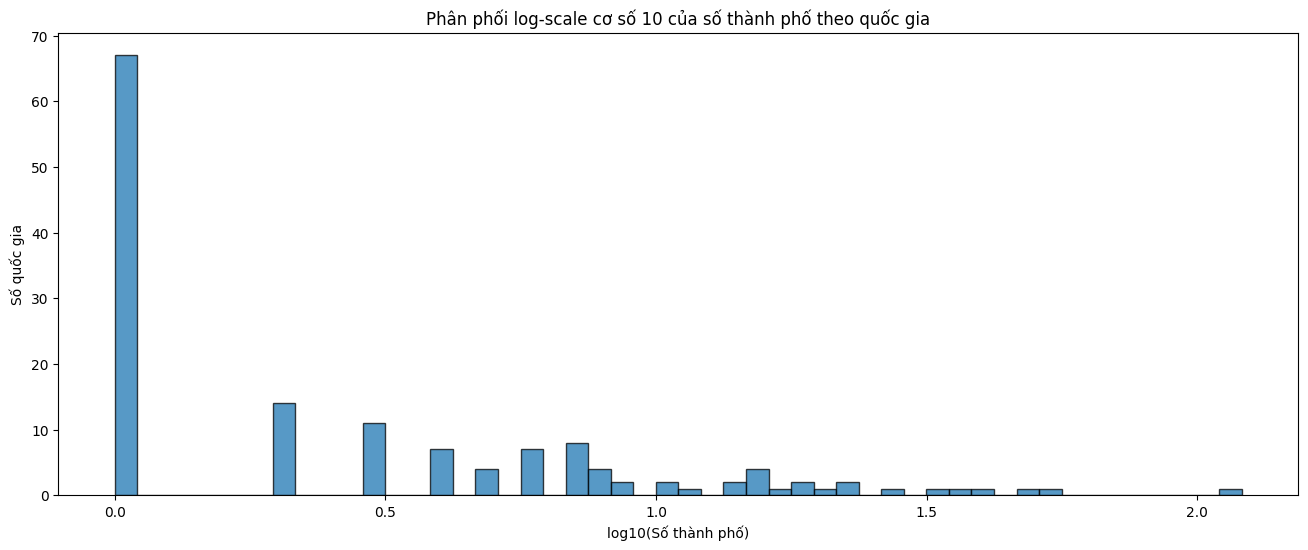

In [16]:
city_count = df_processed.groupby("country")["city"].size().reset_index(name="City Count").sort_values(by="City Count")
city_count.T

#Chuyển City Count sang log scale
city_count['Log City Count'] = np.log(city_count['City Count']) / np.log(10)

plt.figure(figsize=(16, 6))
plt.hist(city_count['Log City Count'], bins=50, alpha=0.75, edgecolor='black', density=False)

plt.xlabel('log10(Số thành phố)')
plt.ylabel('Số quốc gia')
plt.title('Phân phối log-scale cơ số 10 của số thành phố theo quốc gia')
plt.show()

# Dữ liệu cho histogram
fig = px.histogram(city_count, x='Log City Count', nbins=50, 
                   title="Phân phối log-scale cơ số 10 của số thành phố theo quốc gia",
                   labels={'Log City Count': 'log10(Số thành phố)'}, 
                   opacity=0.75)

# Giao diện
fig.update_layout(bargap=0.1, 
                  xaxis_title="log10(Số thành phố)", 
                  yaxis_title="Số quốc gia", 
                  template="plotly_white",
                  height=500)

fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.show()

**Nhận xét:** chưa có

<!--
```python
city_count = df_processed.groupby("country")["city"].size().reset_index(name="City Count").sort_values(by="City Count")
city_count.T

#Chuyển City Count sang log scale
city_count['Log City Count'] = np.log(city_count['City Count']) / np.log(2)

# Dữ liệu cho histogram
fig = px.histogram(city_count, x='Log City Count', nbins=50, 
                   title="Phân phối log-scale cơ số 2 của số thành phố theo quốc gia",
                   labels={'Log City Count': 'log2(Số thành phố)'}, 
                   opacity=1)

# Giao diện
fig.update_layout(bargap=0.1, 
                  xaxis_title="log2(Số thành phố)", 
                  yaxis_title="Số quốc gia", 
                  template="plotly_white",
                  height=500)
fig.show()
```
-->

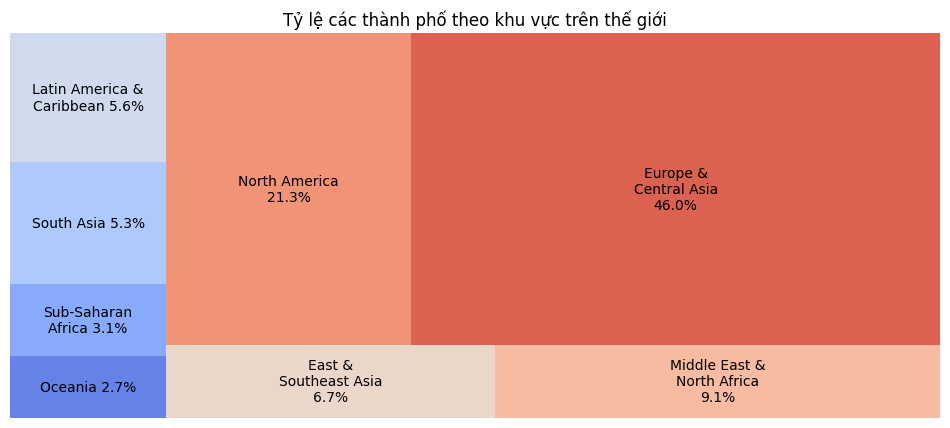

In [17]:
city_count_by_region = df_processed.groupby("region")["city"].size().reset_index(name="City Count").sort_values(by="City Count")
city_count_by_region['Percentage'] = city_count_by_region['City Count'] / city_count_by_region['City Count'].sum() * 100

def wrap_label(text, width=15):
    return "\n".join(wrap(text, width))

sizes = city_count_by_region['City Count']
labels = [wrap_label(f"{row['region']}\n{row['Percentage']:.1f}%", width=15) for _, row in city_count_by_region.iterrows()]
colors = sns.color_palette("coolwarm", len(sizes))

fig, ax = plt.subplots(figsize=(12, 5))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.95,
    pad=False,  # Thêm khoảng cách giữa các ô
    ax=ax
)
plt.title("Tỷ lệ các thành phố theo khu vực trên thế giới")
plt.axis('off')
plt.show()

**Nhận xét:** Chưa có

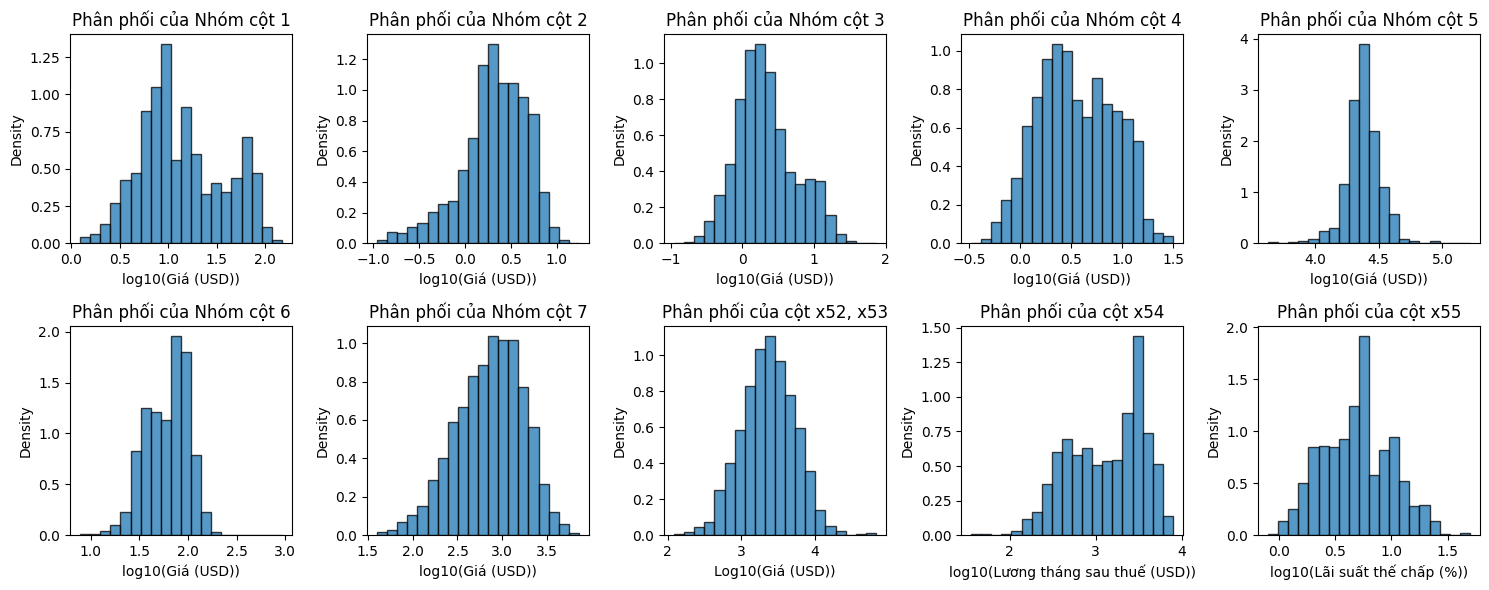

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
groups = [
    ['x1', 'x2', 'x3'],  # Nhóm 1
    ['x4', 'x5', 'x6', 'x7', 'x8'],  # Nhóm 2
    ['x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23'],  # Nhóm 3
    ['x24', 'x25', 'x26', 'x27'],  # Nhóm 4
    ['x34', 'x35'], # Nhóm 5
    ['x44', 'x45', 'x46', 'x47'],  # Nhóm 6
    ['x48', 'x49', 'x50', 'x51'],  # Nhóm 7
    ['x52', 'x53'], 
    ['x54'],  
    ['x55'],  
]

for i, group in enumerate(groups):
    ax = axes[i//5, i%5]
    data = df_processed[group].values.flatten()
    data = np.log(data + 0.001) / np.log(10)
    ax.hist(data, bins=20, alpha=0.75, edgecolor='black', density=True)
    
    if i + 1 == 8: 
        ax.set_title(f"Phân phối của cột x52, x53")
        ax.set_xlabel("Log10(Giá (USD))")
    elif i + 1 == 9:
        ax.set_title(f"Phân phối của cột x54")
        ax.set_xlabel("log10(Lương tháng sau thuế (USD))")
    elif i + 1 == 10:
        ax.set_title(f"Phân phối của cột x55")
        ax.set_xlabel("log10(Lãi suất thế chấp (%))")
    else: 
        ax.set_title(f"Phân phối của Nhóm cột {i+1}")
        ax.set_xlabel("log10(Giá (USD))")
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

**Ghi chú:**

| **Mã nhóm cột**   | **Danh sách cột**                | **Mô tả**                                               |
|-------------------|----------------------------------|---------------------------------------------------------|
| Nhóm cột 1        | `x1` đến `x3`                    | Về chi phí ăn nhà hàng các loại                                          |
| Nhóm cột 2        | `x4` đến `x8`                    | Về chi phí thức uống tại nhà hàng                                           |
| Nhóm cột 3        | `x9` đến `x23`                   | Các loại chi phí mua thực phẩm cần thiết tại chợ                                         |
| Nhóm cột 4        | `x24` đến `x27`                  | Các loại chi phí mua rượu, bia, thuốc lá ngoài thị trường                                          |
| Nhóm cột 5        | `x34`, `x35`                  | Chi phí mua xe hơi (hãng Volkswagen hoặc Toyota)                                         |
| Nhóm cột 6        | `x44` đến `x47`                  | Chi phí về Quần, áo, giày                                         |
| Nhóm cột 7        | `x48` đến `x51`                  | Chi phí thuê căn hộ chung cư                                           |
| Nhóm cột 8       | `x52` đến `x53`                  | Chi phí mua 1m2 nhà ở trung tâm hoặc ngoài trung tâm thành phố                                         |
| -                 | `x54`                 | Lương tháng trung bình sau thuế                                          |
| -                 | `x55`                 | Lãi suất thế chấp (%) theo năm                                         |

**Nhận xét:** Chưa có

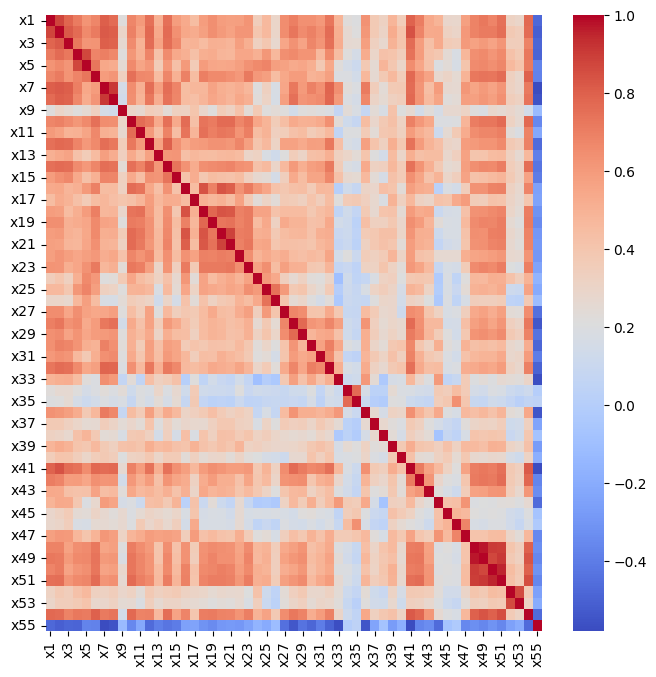

In [19]:
plt.figure(figsize=(8, 8))
correlation_matrix = numeric_cols_df_processed.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.show()

fig = px.imshow(correlation_matrix, 
                labels=dict(x="Variable 1", y="Variable 2", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale="Viridis") 

fig.update_layout(
    title="Heatmap - Ma trận tương quan",
    xaxis_title="Cột",
    yaxis_title="Cột",
    width=800,
    height=800
)
fig.show()

**Nhận xét:**
- **Tổng quan**: Các cột trong ma trận tương quan có mối quan hệ tương quan dương mạnh, phản ánh xu hướng khi giá của một sản phẩm hoặc dịch vụ tăng thì giá của các sản phẩm hoặc dịch vụ khác cũng có xu hướng tăng theo, hoặc ngược lại.

- **Một số ngoại lệ**: Mặc dù có sự tương quan dương mạnh giữa nhiều cột, vẫn tồn tại một số mặt hàng và dịch vụ không có sự tương quan rõ ràng với các cột khác. Điều này có thể được giải thích bởi các yếu tố đặc thù của từng sản phẩm/dịch vụ:

  - **Giá sữa (`x9`)**: Sữa thường có chính sách hỗ trợ giá tại nhiều quốc gia, do đó giá sữa ít chịu ảnh hưởng bởi biến động của các chi phí sinh hoạt khác.
  
  - **Giá xe hiệu Volkswagen (`x34`) và Toyota (`x35`)**: Giá của các loại xe này ít bị tác động bởi các yếu tố chi phí sinh hoạt thông thường, mà chủ yếu chịu ảnh hưởng từ các yếu tố riêng biệt như chi phí sản xuất, giá nhập khẩu và nhu cầu thị trường.
  
  - **Giá dịch vụ Internet (`x38`)**: Đây là dịch vụ chuyên biệt, chịu ảnh hưởng chủ yếu từ các yếu tố hạ tầng công nghệ và các nhà cung cấp dịch vụ, chứ không phụ thuộc nhiều vào các yếu tố chi phí sinh hoạt chung.
  
  - **Giá hàng thời trang cao cấp (`x45`) và giày Nike (`x46`)**: Giá của những mặt hàng này thường có mức độ ổn định và chỉ thay đổi theo chiến lược giá của các doanh nghiệp, không bị tác động mạnh bởi sự biến động của các yếu tố chi phí khác.
  
  - **Lãi suất thế chấp (`x55`)**: Khi lãi suất thế chấp cao, nhu cầu mua hàng của người tiêu dùng có xu hướng giảm, dẫn đến việc thị trường chuyển sang các sản phẩm có giá thành thấp hơn. Điều này giải thích sự thiếu tương quan hoặc thậm chí là tương quan âm giữa lãi suất thế chấp và các mặt hàng tiêu dùng khác.

<!--
```python
correlation_matrix = numeric_cols_df_processed.corr()
fig = px.imshow(correlation_matrix, 
                labels=dict(x="Variable 1", y="Variable 2", color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.index,
                color_continuous_scale="Viridis")  # Sử dụng bảng màu Viridis

# Tùy chỉnh giao diện
fig.update_layout(
    title="Heatmap - Ma trận tương quan",
    xaxis_title="Cột",
    yaxis_title="Cột",
    width=800,
    height=800
)

# Hiển thị biểu đồ
fig.show()


```
-->

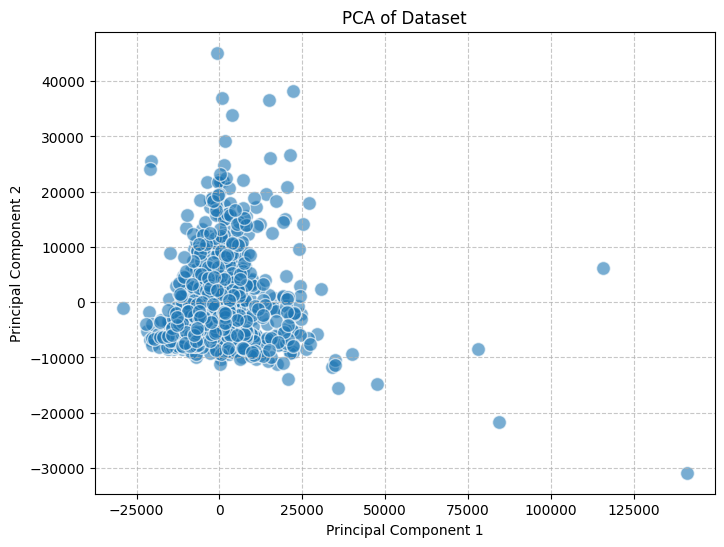

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Chuyển về 2 chiều
pca_result = pca.fit_transform(numeric_cols_df_processed.dropna())

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1],  alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')

plt.grid(True, linestyle='--', alpha=0.7)
sns.set(style="whitegrid")

plt.show()

**Nhận xét:** Chưa có

# <strong>C. Phân tích dữ liệu và đưa ra, trả lời các câu hỏi để giải quyết vấn đề</strong>

In [21]:
northern = ['Europe & Central Asia', 'North America', 'East & Southeast Asia', 'Middle East & North Africa', 'South Asia']
southern = ['Pacific', 'Sub-Saharan Africa', 'Latin America & Caribbean']

## <strong>Câu hỏi 1:</strong> Các thành phố trên toàn cầu có sự thay đổi như thế nào về chỉ số chi phí sinh hoạt (Cost-of-living index - COLI)?

#### Giá trị có thể đạt được:

- Nhìn được xu hướng tổng quan (so với thành phố toàn cầu là NYC). Lưu ý: sẽ lấy những cột nào để cộng vào chi phí so sánh?
- So sánh với TP.HCM thì TP nào có mức sống tương đương (rẻ hơn và mắc hơn trong khoảng alpha-alpha), rẻ hơn và mắc hơn x lần

#### Ý tưởng thực hiện:

Biểu đồ dự kiến: map, thống kê tổng quát

Tham khảo thêm tại [Understanding our Cost of Living Indexes](https://www.numbeo.com/cost-of-living/cpi_explained.jsp) và [Methodology and Motivation](https://www.numbeo.com/common/motivation_and_methodology.jsp)


#### Thực hiện

In [22]:
data_dictionary = pd.read_csv('./data/data-dictionary.csv', sep='\t')
current_weights = pd.read_csv('./data/current-weights.csv', sep='\t')

name_to_column_map = dict(zip(data_dictionary["Description"].str.replace(r" \(USD\)", "", regex=True), data_dictionary["Column"]))
current_weights["Column"] = current_weights["name"].map(name_to_column_map)

In [23]:
df_indices = df_processed.copy()
basket_cols = ["BasketConsumer", "BasketRent", "BasketGroceries", "BasketRestaurants", "BasketConsumerPlusRent"]
df_indices = df_indices.reindex(columns=df_indices.columns.tolist() + basket_cols, fill_value=0)
index_cols = ["COLI (Excl. Rent)", "RentIndex", "GroceriesIndex", "RestaurantsIndex", "COLI (Plus Rent)", "Local Purchasing Power Index"]
df_indices = df_indices.reindex(columns=df_indices.columns.tolist() + index_cols, fill_value=0)

# Tính từng chỉ số Basket tương ứng các cột trong basket_cols
for basket_col in basket_cols:
    if basket_col == "BasketConsumer":
        cols = current_weights[current_weights['category'] != "Rent Per Month"][["Column", "cost_of_living_factor", "rent_factor"]]
    elif basket_col == "BasketRent": 
        cols = current_weights[current_weights['category'] == "Rent Per Month"][["Column", "cost_of_living_factor", "rent_factor"]]
    elif basket_col == "BasketGroceries":
        cols = current_weights[current_weights['category'] == "Markets"][["Column", "cost_of_living_factor", "rent_factor"]]
    elif basket_col == "BasketRestaurants":    
        cols = current_weights[current_weights['category'] == "Restaurants"][["Column", "cost_of_living_factor", "rent_factor"]]
    else:
        cols = current_weights[["Column", "cost_of_living_factor", "rent_factor"]]
        
    for col in cols["Column"]:
        df_indices[basket_col] += df_indices[col] * (cols.set_index("Column").T[col]['cost_of_living_factor'] + cols.set_index("Column").T[col]['rent_factor'])

# Tính từng chỉ số index (bao gồm COLI) tương ứng các cột trong index_cols 
for i in range(0, len(basket_cols)):
    res = df_indices[basket_cols[i]] / df_indices.loc[df_indices["city"] == "New York", basket_cols[i]].values[0]
    df_indices[index_cols[i]] = round(res * 100, 2)

# Tính chỉ số sức mua của cư dân trong thành phố (Local Purchasing Power Index)
df_indices["Local Purchasing Power Index"] = round(((df_indices['x54'] / df_indices['BasketConsumerPlusRent']) / (df_indices.loc[df_indices["city"] == "New York", 'x54'].values[0] / df_indices.loc[df_indices["city"] == "New York", 'BasketConsumerPlusRent'].values[0])) * 100, 2)

df_indices = df_indices[["city", "country", "region", "x54"] + index_cols + basket_cols]

#### Trực quan hóa

                            COLI (Excl. Rent)  RentIndex  GroceriesIndex  \
region                                                                     
South Asia                          24.308542   5.160408       23.643673   
Latin America & Caribbean           35.629615   9.464423       31.527885   
Sub-Saharan Africa                  37.405862  16.368276       33.587241   
Middle East & North Africa          43.654819  14.665595       37.554578   
East & Southeast Asia               43.938871  16.603387       47.468548   
Europe & Central Asia               55.888118  20.832494       47.923694   
Oceania                             69.233200  31.726400       69.895600   
North America                       67.824264  39.193858       67.945431   

                            RestaurantsIndex  COLI (Plus Rent)  \
region                                                           
South Asia                         16.904167         15.041458   
Latin America & Caribbean          29.160

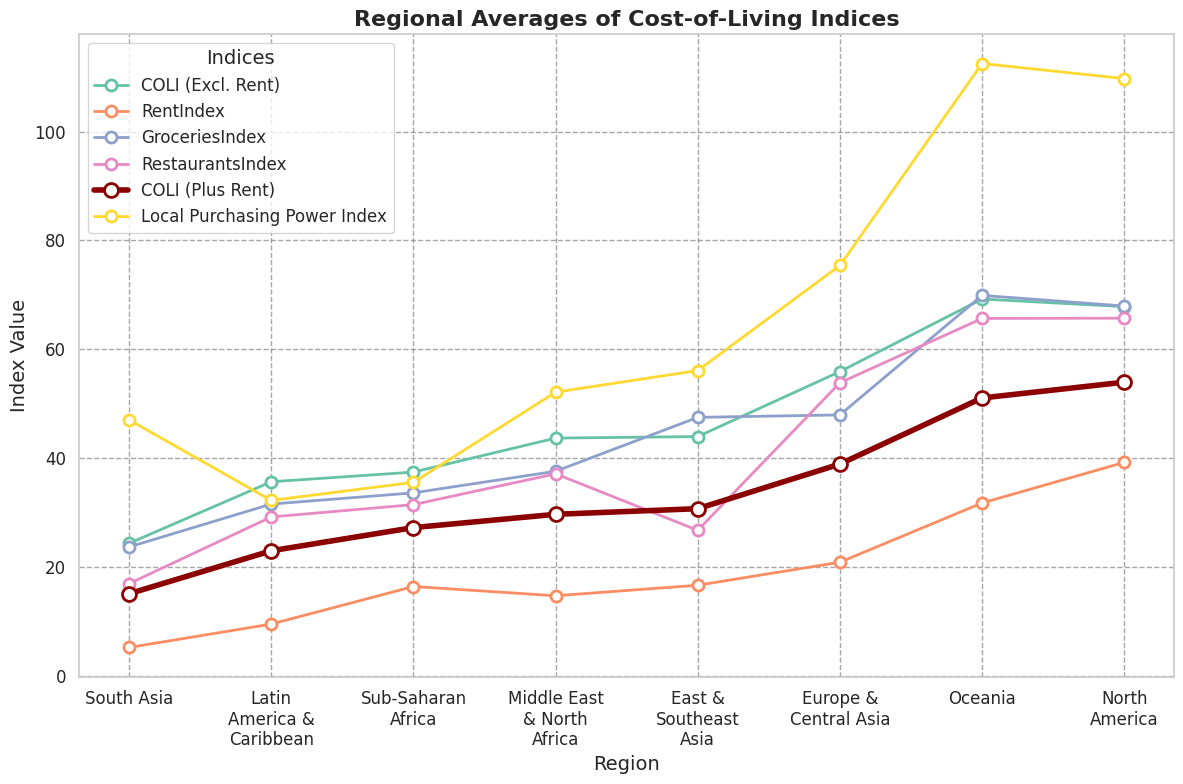

In [24]:
# Tính giá trị trung bình cho từng region
region_avg = df_indices.groupby('region', observed=False)[index_cols].mean()
region_avg = region_avg.sort_values(by='COLI (Plus Rent)')
print(region_avg)

# Cập nhật thứ tự category của cột 'region' trong df_indices
df_indices['region'] = pd.Categorical(df_indices['region'], categories=region_avg.index, ordered=True)

# Sử dụng bảng màu từ Seaborn để tạo đường nét đẹp
sns.set(style="whitegrid", palette="muted")

# Thiết lập lại biểu đồ
plt.figure(figsize=(12, 8))

# Lặp qua từng chỉ số để vẽ từng đường với các điểm đánh dấu và hiệu ứng
for index in index_cols:
    # Các tham số chung cho tất cả các đường
    kwargs = {
        'label': index,
        'marker': 'o',
        'markersize': 10 if index == 'COLI (Plus Rent)' else 8,
        'linestyle': '-',
        'linewidth': 4 if index == 'COLI (Plus Rent)' else 2,
        'markerfacecolor': 'white',
        'markeredgewidth': 2
    }
    # Thêm màu sắc đặc biệt cho 'COLI (Plus Rent)', và màu khác cho các chỉ số còn lại
    kwargs['color'] = 'darkred' if index == 'COLI (Plus Rent)' else sns.color_palette("Set2")[index_cols.index(index) % 8]

    plt.plot(region_avg.index, region_avg[index], **kwargs)

# Sử dụng textwrap để chia nhãn của trục x thành nhiều dòng nếu cần
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=12)) for label in region_avg.index]

# Thiết lập biểu đồ với kiểu dáng đẹp và dễ nhìn
plt.title("Regional Averages of Cost-of-Living Indices", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=14)
plt.ylabel("Index Value", fontsize=14)
plt.xticks(ticks=range(len(region_avg.index)), labels=wrapped_labels, rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Indices", fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, color='gray')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [25]:
# Tính trung bình COLI (Plus Rent) theo quốc gia
country_coli = df_indices.groupby('country')['COLI (Plus Rent)'].mean().reset_index()

# Vẽ bản đồ với Plotly
fig = px.choropleth(country_coli,
                    locations="country",  # Tên quốc gia
                    locationmode="country names",  # Sử dụng tên quốc gia
                    color="COLI (Plus Rent)",  # Dữ liệu được sử dụng để tô màu
                    color_continuous_scale="YlOrRd",  # Màu sắc
                    title="Bản đồ phân phối COLI (Plus Rent) trên thế giới")

# Cập nhật layout để làm bản đồ lớn hơn
fig.update_layout(
    width=1100,  # Chỉnh chiều rộng
    height=800,  # Chỉnh chiều cao
)

# Cập nhật các yếu tố hiển thị của bản đồ
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")

fig.show()

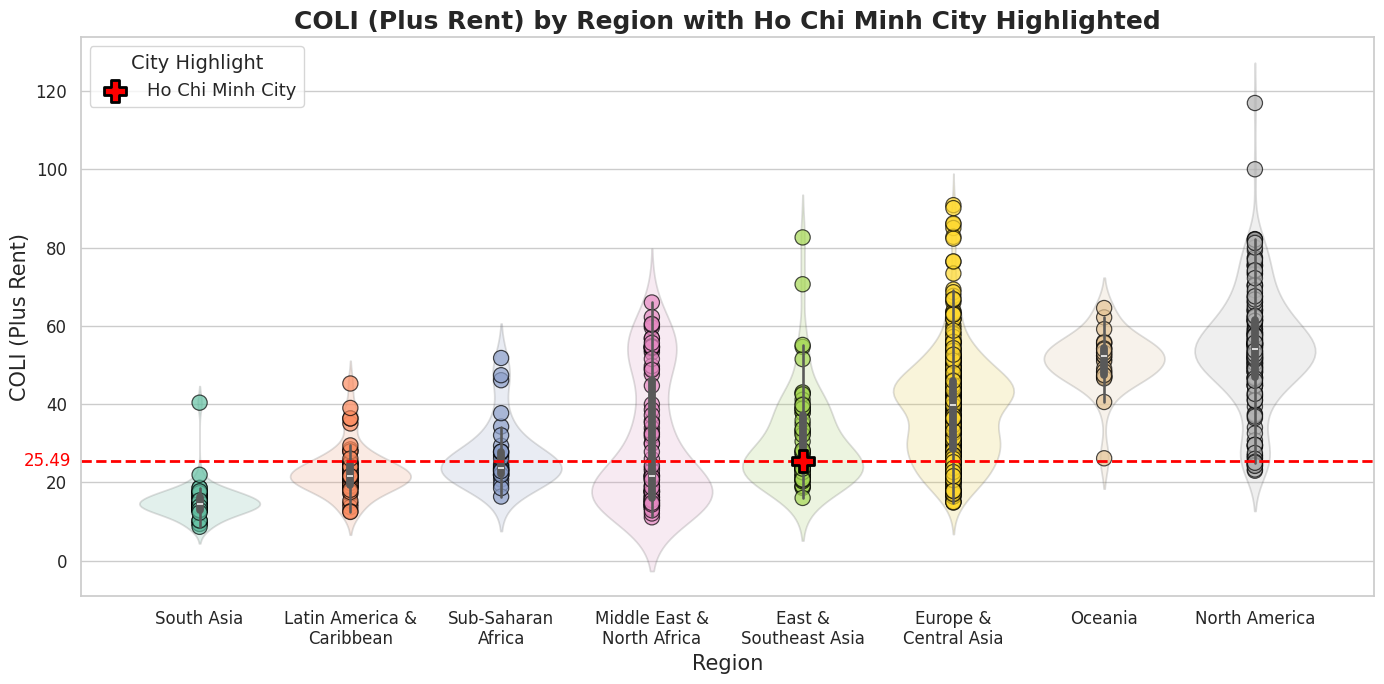

In [26]:
# Giả sử df_indices là DataFrame chứa dữ liệu của bạn
highlight_city = "Ho Chi Minh City"

# Tính COLI trung bình cho mỗi region
region_avg_coli = df_indices.groupby('region', observed=False)['COLI (Plus Rent)'].mean()
region_avg_coli = region_avg_coli.sort_values()  # Sắp xếp trung bình COLI theo giá trị tăng dần

# Sắp xếp lại df_indices theo thứ tự của region_avg_coli
df_indices['region'] = pd.Categorical(df_indices['region'], categories=region_avg_coli.index, ordered=True)

# Sắp xếp hàng trong DataFrame theo thứ tự của cột 'region'
df_indices = df_indices.sort_values(by='region')

# Tạo figure và ax1 cho biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 7))

# Vẽ violin chart dưới biểu đồ scatter cho COLI (Plus Rent) ở mỗi region
sns.violinplot(x='region', y='COLI (Plus Rent)', data=df_indices, hue='region', palette='Set2', alpha=0.2, ax=ax1)

# Vẽ scatter plot cho các thành phố theo region và COLI (Plus Rent)
sns.scatterplot(x='region', y='COLI (Plus Rent)', data=df_indices, hue='region', palette='Set2', 
                s=120, edgecolor='black', alpha=0.7, marker='o', legend=None, ax=ax1)

# Vẽ điểm Ho Chi Minh City với màu sắc nổi bật và hình dạng đặc biệt
highlight_data = df_indices[df_indices['city'] == highlight_city]
sns.scatterplot(x=highlight_data['region'], y=highlight_data['COLI (Plus Rent)'], color='red', s=250, 
                label=highlight_city, marker='P', edgecolor='black', linewidth=2, ax=ax1, zorder=5)

# Tùy chỉnh tiêu đề, trục và nhãn cho ax1
ax1.set_title('COLI (Plus Rent) by Region with Ho Chi Minh City Highlighted', fontsize=18, weight='bold')
ax1.set_xlabel('Region', fontsize=15)
ax1.set_ylabel('COLI (Plus Rent)', fontsize=15)

# Sử dụng textwrap.wrap trực tiếp cho nhãn trục x và sắp xếp lại
ax1.set_xticks(range(len(df_indices['region'].unique())))  # Đặt vị trí tick theo số lượng region
ax1.set_xticklabels([ '\n'.join(textwrap.wrap(label, 15)) for label in df_indices['region'].cat.categories ], ha='center', fontsize=12)

ax1.tick_params(axis='y', labelsize=12)

# Lấy giá trị COLI (Plus Rent) của Ho Chi Minh City
city_coli_value = highlight_data['COLI (Plus Rent)'].values[0]

# Vẽ đường ngang cắt ngang qua giá trị COLI (Plus Rent) của Ho Chi Minh City
ax1.axhline(y=city_coli_value, color='red', linestyle='--', linewidth=2)

# Thêm chú thích cho giá trị của đường cắt ngang gần trục y
ax1.text(x=-0.85, y=city_coli_value, s=f'{city_coli_value:.2f}', color='red', ha='right', va='center', fontsize=12)

# Thêm chú thích vào ax1
ax1.legend(title='City Highlight', fontsize=13, title_fontsize=14, loc='upper left')

# Đảm bảo độ sáng nền
fig.patch.set_facecolor('white')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [27]:
highlight_city = 'Ho Chi Minh City'
filter_option = 0  # {0: Bình thường/Chặn trên chặn dưới, 1: Top 10 cao nhất, -1: Top 10 thấp nhất}
top_rank = 300

# Đặt giới hạn chặn trên và chặn dưới
default_limit = df_indices['COLI (Plus Rent)'].max()
upper_limit, lower_limit = default_limit + 1, -(default_limit + 1)

# Lọc dữ liệu của Ho Chi Minh City và tính độ chênh lệch COLI
highlight_data = df_indices[df_indices['city'] == highlight_city]
highlight_coli = highlight_data['COLI (Plus Rent)'].iloc[0] if not highlight_data.empty else None
coli_difference = df_indices['COLI (Plus Rent)'] - highlight_coli

# Lọc ra các thành phố có độ chênh lệch COLI trong phạm vi chặn
if filter_option == 0:
    df_filtered = df_indices[(coli_difference <= upper_limit) & (coli_difference >= lower_limit)]
    title = "Cost of Living Index (COLI) by Region (Including Rent)"
elif filter_option == 1:
    df_filtered = df_indices.nlargest(top_rank, 'COLI (Plus Rent)')
    title = "Cost of Living Index (COLI) by Region (Including Rent)"
else:
    df_filtered = df_indices.nsmallest(top_rank, 'COLI (Plus Rent)')
    title = "Cost of Living Index (COLI) by Region (Including Rent)"

# Hàm chia nhãn dài thành nhiều dòng
def split_label(label, max_length=10):
    return '<br>'.join(textwrap.wrap(label, max_length))

# Tính giá trị COLI trung bình cho mỗi khu vực và sắp xếp
region_avg_coli = df_indices.groupby('region', observed=False)['COLI (Plus Rent)'].mean().sort_values()
df_indices['region'] = pd.Categorical(df_indices['region'], categories=region_avg_coli.index, ordered=True)
df_indices = df_indices.sort_values('region')

# Áp dụng chia nhãn cho trục x
df_indices['region_wrapped'] = df_indices['region'].apply(lambda x: split_label(x, max_length=12))

# Áp dụng cột 'region_wrapped' vào df_filtered
df_filtered.loc[:, 'region_wrapped'] = df_filtered['region'].apply(lambda x: split_label(x, max_length=12))

# Đảm bảo ánh xạ màu cho các khu vực
colors = {region: color for region, color in zip(df_filtered['region'].unique(), ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])}

# Vẽ đồ thị
fig = go.Figure()

# Vẽ scatter plot cho các thành phố
fig.add_trace(go.Scatter(x=df_filtered['region'], y=df_filtered['COLI (Plus Rent)'], mode='markers', 
                         marker=dict(color=df_filtered['region'].map(colors), size=12, line=dict(color='black', width=1)),
                         name="Cities", text=df_filtered['city'], customdata=df_filtered['country'],
                         hovertemplate='<b>%{text}</b><br>Country: %{customdata}<br>COLI (Plus Rent): %{y}<br><extra></extra>'))

# Vẽ điểm nổi bật cho Ho Chi Minh City nếu có
if highlight_coli is not None:
    fig.add_trace(go.Scatter(x=highlight_data['region'], y=highlight_data['COLI (Plus Rent)'], mode='markers',
                             marker=dict(color='red', size=15, symbol='star', line=dict(color='black', width=2)),
                             name=highlight_city, text=highlight_data['city'], customdata=highlight_data['country'],
                             hovertemplate='<b>%{text}</b><br>Country: %{customdata}<br>COLI (Plus Rent): %{y}<br><extra></extra>'))

    # Thêm đường ngang và ghi chú cho COLI của Ho Chi Minh City
    fig.add_shape(type="line", x0=-0.5, x1=len(df_filtered['region'].unique()) - 0.5, y0=highlight_coli, y1=highlight_coli, 
                  line=dict(color="red", width=2, dash="dash"), xref="x", yref="y")
    fig.add_annotation(xref="paper", yref="y", x=-0.05, y=highlight_coli, text=f"{highlight_coli:.2f}", showarrow=False, 
                       font=dict(size=12, color="red"), align="left")

# Cập nhật layout và hiển thị đồ thị
fig.update_layout(title=title, 
                  xaxis_title="Region", yaxis_title="COLI (Plus Rent)", 
                  showlegend=True, width=1000, height=600,
                  xaxis=dict(tickvals=df_filtered['region'], ticktext=df_filtered['region_wrapped'], automargin=True))
fig.show()


In [28]:
# Sắp xếp toàn bộ thành phố theo COLI (Plus Rent) giảm dần
region_name = 'East & Southeast Asia'
city_coli = df_indices[df_indices['region'] == region_name].copy()

# Lọc các thành phố có COLI (Plus Rent) không phải NaN
city_coli = city_coli[city_coli['COLI (Plus Rent)'].notna()]

# Tạo cột phân loại khu vực con
east_asia_countries = ['China', 'Japan', 'South Korea', 'North Korea', 'Mongolia', 'Taiwan', 'Hong Kong', 'Macau']
southeast_asia_countries = ['Vietnam', 'Thailand', 'Malaysia', 'Indonesia', 'Philippines', 'Singapore', 'Myanmar', 'Cambodia', 'Laos', 'Brunei', 'Timor-Leste']

city_coli['sub_region'] = city_coli['country'].apply(
    lambda x: 'East Asia' if x in east_asia_countries else
              'Southeast Asia' if x in southeast_asia_countries else
              'Other'
)

# Tạo cột màu sắc theo quy tắc
city_coli['Region'] = city_coli.apply(
    lambda row: 'Viet Nam' if row['country'] == 'Vietnam' else
                'East Asia' if row['sub_region'] == 'East Asia' else
                'Southeast Asia',
    axis=1
)

# Sắp xếp theo COLI (Plus Rent) giảm dần
city_coli = city_coli.sort_values(by='COLI (Plus Rent)', ascending=False)

# Đảm bảo chỉ hiển thị tối đa 30 city labels
total_cities = len(city_coli)
step = max(total_cities // 30, 1)  # Chọn số lượng nhãn cần hiển thị

# Cập nhật trục X sao cho chỉ có tối đa 30 nhãn
labels_to_show = city_coli['city'].iloc[::step].tolist()

# Đảm bảo thứ tự trục x trên biểu đồ tuân theo thứ tự trong DataFrame
fig = px.bar(city_coli,
             x='city',
             y='COLI (Plus Rent)',  # Đổi cột y thành COLI (Plus Rent)
             title=f'So sánh COLI (Plus Rent) của {total_cities} thành phố thuộc khu vực {region_name}',
             labels={'city': 'city', 'COLI (Plus Rent)': 'COLI (Plus Rent)'},
             color='Region',  # Sử dụng màu đã tạo
             color_discrete_map={
                 'Viet Nam': '#BC002D',     
                 'East Asia': '#D3D3D3',     
                 'Southeast Asia': '#F2A0B1'
             },
             category_orders={'city': city_coli['city'].tolist()}  # Đặt thứ tự trục x
)

# Cập nhật nhãn trục X để chỉ hiển thị một số nhãn nhất định
fig.update_layout(
    xaxis_tickangle=-90,  # Xoay nhãn trục X cho dễ đọc
    xaxis_tickvals=city_coli['city'].iloc[::step],  # Hiển thị nhãn cho các thành phố đã chọn
    height=600,  # Điều chỉnh chiều cao
    width=1100,  # Điều chỉnh chiều rộng
    showlegend=True,
    bargap=0.001,  # Giảm khoảng cách giữa các cột
)

fig.show()


## <strong>Câu hỏi 2:</strong> COLI và Tỷ lệ `Thu nhập trung bình hàng tháng` / NYC

#### Giá trị có thể đạt được:

 Tìm ra các thành phố có mức chi phí sinh hoạt cao hơn so với thu nhập trung bình, giúp đánh giá mức độ áp lực tài chính tại những khu vực này cũng như  sự mất cân bằng lớn giữa chi phí sinh hoạt và thu nhập. 

#### Ý tưởng thực hiện:

Xem thêm về scatter plot Lương và COLI tại [đây](https://digg.com/data-viz/link/use-cost-of-living-income-compared-to-world-chart)

Câu 1-2: Top 10 cao nhất, thấp nhất (biểu đồ cột)

Câu 2 (1?): So HCMC trong khu vực

#### Thực hiện

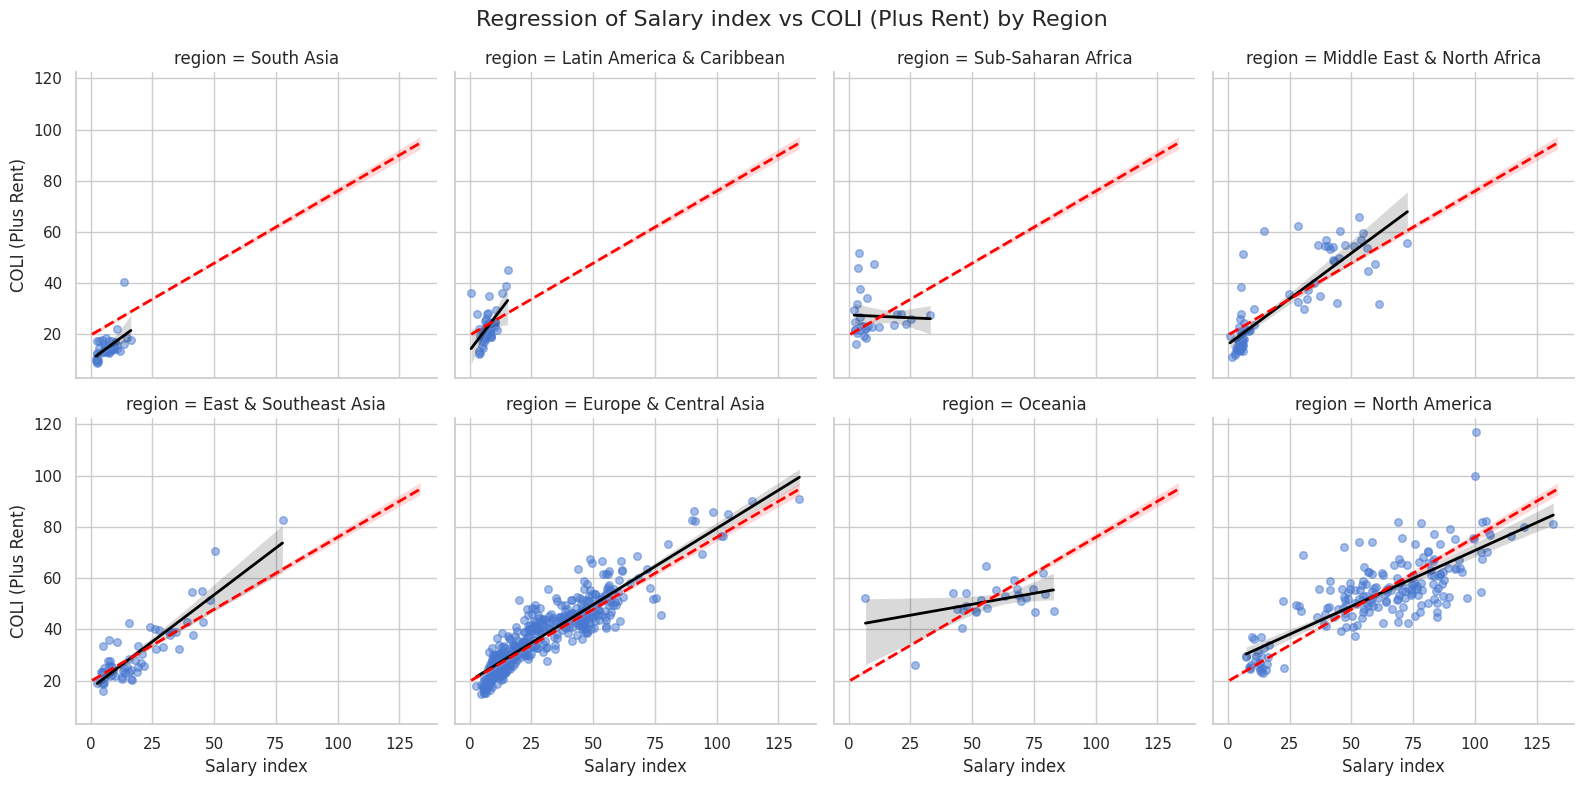

In [29]:
# Giả sử df_indices đã được đọc vào DataFrame và đã có cột 'Salary index'
df_indices["Salary index"] = round((df_indices['x54'] / df_indices.loc[df_indices["city"] == "New York", 'x54'].values[0]) * 100, 2)

# Tạo FacetGrid cho từng vùng
g = sns.FacetGrid(df_indices, col="region", col_wrap=4, height=4)
g.map(sns.regplot, "Salary index", "COLI (Plus Rent)", scatter_kws={'s': 30, 'alpha': 0.5}, line_kws={'color': 'black', 'lw': 2})

# Thêm đường hồi quy tổng cho toàn bộ dữ liệu
def add_total_regression(*args, **kwargs):
    # Vẽ hồi quy tổng cho toàn bộ dữ liệu (sử dụng df_indices toàn bộ)
    sns.regplot(data=df_indices, x="Salary index", y="COLI (Plus Rent)", scatter=False, line_kws={'color': 'red', 'lw': 2, 'ls': '--'})

# Áp dụng hàm add_total_regression cho mỗi ô trong FacetGrid
g.map(add_total_regression)

# Thêm tiêu đề và các nhãn cho trục
g.set_axis_labels('Salary index', 'COLI (Plus Rent)')
g.fig.suptitle('Regression of Salary index vs COLI (Plus Rent) by Region', fontsize=16)
plt.tight_layout()
plt.show()


In [30]:
# Giả sử df_indices là DataFrame của bạn, với 'country' và 'COLI (Plus Rent)' là các cột
# Tính trung bình COLI (Plus Rent) theo quốc gia
country_coli = df_indices.groupby('country')['Local Purchasing Power Index'].mean().reset_index()

# Vẽ bản đồ với Plotly
fig = px.choropleth(country_coli,
                    locations="country",  # Tên quốc gia
                    locationmode="country names",  # Sử dụng tên quốc gia
                    color="Local Purchasing Power Index",  # Dữ liệu được sử dụng để tô màu
                    color_continuous_scale="YlOrRd",  # Màu sắc
                    title="Bản đồ phân phối Local Purchasing Power Index trên thế giới")

# Cập nhật layout để làm bản đồ lớn hơn
fig.update_layout(
    width=1200,  # Chỉnh chiều rộng
    height=800,  # Chỉnh chiều cao
)

# Cập nhật các yếu tố hiển thị của bản đồ
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")

fig.show()

In [31]:
# Sắp xếp toàn bộ thành phố theo Local Purchasing Power Index giảm dần
region_name = 'East & Southeast Asia'
city_lppi = df_indices[df_indices['region'] == region_name].copy()

# Lọc các thành phố có Local Purchasing Power Index không phải NaN
city_lppi = city_lppi[city_lppi['Local Purchasing Power Index'].notna()] 

# Tạo cột phân loại khu vực con
east_asia_countries = ['China', 'Japan', 'South Korea', 'North Korea', 'Mongolia', 'Taiwan', 'Hong Kong', 'Macau']
southeast_asia_countries = ['Vietnam', 'Thailand', 'Malaysia', 'Indonesia', 'Philippines', 'Singapore', 'Myanmar', 'Cambodia', 'Laos', 'Brunei', 'Timor-Leste']

city_lppi['sub_region'] = city_lppi['country'].apply(
    lambda x: 'East Asia' if x in east_asia_countries else
              'Southeast Asia' if x in southeast_asia_countries else
              'Other'
)

# Tạo cột màu sắc theo quy tắc
city_lppi['Region'] = city_lppi.apply(
    lambda row: 'Viet Nam' if row['country'] == 'Vietnam' else
                'East Asia' if row['sub_region'] == 'East Asia' else
                'Southeast Asia',
    axis=1
)

# Sắp xếp theo Local Purchasing Power Index giảm dần
city_lppi = city_lppi.sort_values(by='Local Purchasing Power Index', ascending=False)

# Đảm bảo chỉ hiển thị tối đa 30 city labels
total_cities = len(city_lppi)
step = max(total_cities // 30, 1)  # Chọn số lượng nhãn cần hiển thị

# Cập nhật trục X sao cho chỉ có tối đa 30 nhãn
labels_to_show = city_lppi['city'].iloc[::step].tolist()

# Đảm bảo thứ tự trục x trên biểu đồ tuân theo thứ tự trong DataFrame
fig = px.bar(city_lppi,
             x='city',
             y='Local Purchasing Power Index',  # Đổi cột y thành Local Purchasing Power Index
             title=f'So sánh Local Purchasing Power Index của {total_cities} thành phố thuộc khu vực {region_name}',
             labels={'city': 'City', 'Local Purchasing Power Index': 'Local Purchasing Power Index'},
             color='Region',  # Sử dụng màu đã tạo
             color_discrete_map={
                 'Viet Nam': '#0047A0',     
                 'East Asia': '#D3D3D3',     
                 'Southeast Asia': '#80A3D0'
             },
             category_orders={'city': city_lppi['city'].tolist()}  # Đặt thứ tự trục x
)

# Cập nhật nhãn trục X để chỉ hiển thị một số nhãn nhất định
fig.update_layout(
    xaxis_tickangle=-90,  # Xoay nhãn trục X cho dễ đọc
    xaxis_tickvals=city_lppi['city'].iloc[::step],  # Hiển thị nhãn cho các thành phố đã chọn
    height=600,  # Điều chỉnh chiều cao
    width=1100,  # Điều chỉnh chiều rộng
    showlegend=True,
    bargap=0.001,  # Giảm khoảng cách giữa các cột
)

fig.show()

## <strong>Câu hỏi 3:</strong> Để đạt được mục tiêu dài hạn như sở hữu một chiếc xe hơi hoặc một căn nhà, người dân cần tối thiểu bao nhiêu tháng lương?

#### Giá trị có thể đạt được:

Việc ước tính số tháng lương trung bình cần để mua xe hơi hoặc nhà giúp đánh giá khả năng chi trả của người dân tại các khu vực, quốc gia hoặc thành phố. Điều này cung cấp cái nhìn về sự chênh lệch thu nhập và mức sống, từ đó hỗ trợ xây dựng chính sách cải thiện thu nhập và tài chính dài hạn.

Ngoài ra, việc giải quyết câu hỏi này giúp người dân hiểu rõ hơn về tài chính cá nhân, đưa ra kế hoạch tiết kiệm, chi tiêu hợp lý và quyết định giữa việc mua trực tiếp hay vay trả góp. Đồng thời, nó cũng giúp so sánh mức sống và thu nhập giữa các khu vực, hỗ trợ trong việc lựa chọn nơi sống hoặc thay đổi công việc.

#### Ý tưởng thực hiện:

Khi tính số tháng lương tối thiểu để người dân có thể sở hữu một chiếc xe hơi/một căn nhà thì xét trong 2 trường hợp: (1) Người dân tiết kiệm lương tháng để mua và (2) Người dân vay trả góp để mua (lãi suất theo năm). Từ đó có thể thấy được số tháng tối thiểu và so sánh giữa 2 trường hợp trên. 

**Giả định trong tính toán dưới đây:** một người sử dụng toàn bộ lương tháng của mình để tiết kiệm hoặc trả nợ nhằm mua xe hơi hoặc nhà, với mức lương trung bình cố định và giá cả (xe hơi, nhà ở) không thay đổi theo thời gian.

**Chia thành 02 câu nhỏ như sau:** **Câu 4.1:** Cần bao nhiêu tháng lương tối thiểu để người dân có thể sở hữu một chiếc xe hơi? và **Câu 4.2:** Cần bao nhiêu tháng lương tối thiểu để người dân có thể sở hữu một căn nhà (ở trung tâm/ngoài trung tâm)?

**Phương pháp:**
- **Quy mô xem xét:** *Theo thành phố, quốc gia, vùng địa lý hay 2 bán cầu?*
- **Cách thực hiện:**
    - Đối với hình thức tiết kiệm rồi mới mua thì: `Số tháng lương tốt thiểu` = `Giá xe hơi hoặc Giá nhà ở` / `Lương tháng trung bình` (số tháng làm tròn lên)
    - Đối với hình thức vay trước trả theo lãi suất hàng năm: 
- **Các cột dữ liệu được sử dụng:** 
- **Biểu đồ dự kiến sử dụng:**

#### Tổng quát

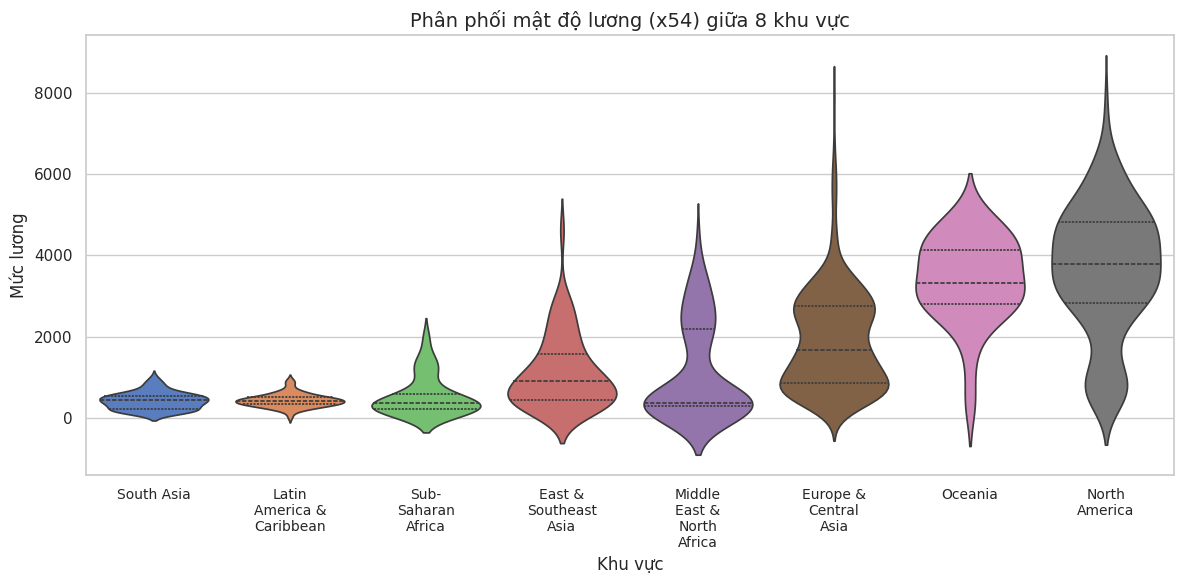

In [32]:
# Tính lương trung bình theo khu vực
mean_salary_by_region = df_processed.groupby('region')['x54'].mean().sort_values(ascending=True)  # Sắp xếp theo lương trung bình tăng dần

# Sắp xếp lại dữ liệu dựa trên lương trung bình của các khu vực
df_processed['region'] = pd.Categorical(df_processed['region'], categories=mean_salary_by_region.index, ordered=True)

# Vẽ biểu đồ violin plot
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước rộng và cao
sns.violinplot(data=df_processed, x='region', y='x54', hue='region', palette='muted', inner='quartile', dodge=False)
plt.title('Phân phối mật độ lương (x54) giữa 8 khu vực', fontsize=14)  # Tăng kích thước font tiêu đề
plt.ylabel('Mức lương', fontsize=12)  # Tăng kích thước font cho trục y
plt.xlabel('Khu vực', fontsize=12)  # Tăng kích thước font cho trục x

# Áp dụng ngắt dòng trực tiếp trong xticks
plt.xticks(
    ticks=range(len(df_processed['region'].unique())), 
    labels=[textwrap.fill(label, width=10) for label in mean_salary_by_region.index], 
    fontsize=10  # Kích thước font của nhãn
)

plt.legend([], [], frameon=False)  # Ẩn chú giải nếu không cần thiết
plt.tight_layout()  # Đảm bảo các phần không bị cắt
plt.show()


In [33]:
# Sắp xếp toàn bộ thành phố theo Salary Index giảm dần
region_name = 'East & Southeast Asia'
salary_index = 'x54'
city_salary = df_indices[df_indices['region'] == region_name].copy()

# Lọc các thành phố có Salary Index không phải NaN
city_salary = city_salary[city_salary[salary_index].notna()] 

# Tạo cột phân loại khu vực con
east_asia_countries = ['China', 'Japan', 'South Korea', 'North Korea', 'Mongolia', 'Taiwan', 'Hong Kong', 'Macau']
southeast_asia_countries = ['Vietnam', 'Thailand', 'Malaysia', 'Indonesia', 'Philippines', 'Singapore', 'Myanmar', 'Cambodia', 'Laos', 'Brunei', 'Timor-Leste']

city_salary['sub_region'] = city_salary['country'].apply(
    lambda x: 'East Asia' if x in east_asia_countries else
              'Southeast Asia' if x in southeast_asia_countries else
              'Other'
)

# Tạo cột màu sắc theo quy tắc
city_salary['Region'] = city_salary.apply(
    lambda row: 'Viet Nam' if row['country'] == 'Vietnam' else
                'East Asia' if row['sub_region'] == 'East Asia' else
                'Southeast Asia',
    axis=1
)

# Sắp xếp theo Salary Index giảm dần
city_salary = city_salary.sort_values(by=salary_index, ascending=False)

# Đảm bảo chỉ hiển thị tối đa 30 city labels
total_cities = len(city_salary)
step = max(total_cities // 30, 1)  # Chọn số lượng nhãn cần hiển thị

# Cập nhật trục X sao cho chỉ có tối đa 30 nhãn
labels_to_show = city_salary['city'].iloc[::step].tolist()

# Đảm bảo thứ tự trục x trên biểu đồ tuân theo thứ tự trong DataFrame
fig = px.bar(city_salary,
             x='city',
             y=salary_index,  # Đổi cột y thành Salary Index
             title=f'So sánh Salary Index của {total_cities} thành phố thuộc khu vực {region_name}',
             labels={'city': 'City', salary_index: 'Salary Index'},
             color='Region',  # Sử dụng màu đã tạo
             color_discrete_map={
                 'Viet Nam': '#dcab04',     
                 'East Asia': '#D3D3D3',     
                 'Southeast Asia': '#F2CE80'
             },
             category_orders={'city': city_salary['city'].tolist()}  # Đặt thứ tự trục x
)

# Cập nhật nhãn trục X để chỉ hiển thị một số nhãn nhất định
fig.update_layout(
    xaxis_tickangle=-90,  # Xoay nhãn trục X cho dễ đọc
    xaxis_tickvals=city_salary['city'].iloc[::step],  # Hiển thị nhãn cho các thành phố đã chọn
    height=600,  # Điều chỉnh chiều cao
    width=1100,  # Điều chỉnh chiều rộng
    showlegend=True,
    bargap=0.001,  # Giảm khoảng cách giữa các cột
)

fig.show()


#### Bài toán tính số năm trả hết nợ


Giả sử mỗi năm người vay một khoản $principal$ (đơn vị: USD) với lãi suất hàng năm là $rate$ (đơn vị: %). Mỗi năm người vay phải trả ngân hàng một khoản $salary$ (đơn vị: USD). 

##### Phương trình mô tả số tiền còn lại phải trả sau mỗi năm

Ban đầu, số tiền phải trả là: $f(\text{year}=0) = \text{principal}$

- Sau 1 năm, số tiền còn lại là: $f(\text{year}=1) = \text{principal} \times (1 + \text{rate}) - \text{salary}$
- Sau 2 năm, số tiền còn lại là: $f(\text{year}=2) = \left( \text{principal} \times (1 + \text{rate}) - \text{salary} \right) \times (1 + \text{rate}) - \text{salary}$
    - Điều này có thể viết lại là: $f(\text{year}=2) = \text{principal} \times (1 + \text{rate})^2 - \text{salary} \times (1 + \text{rate}) - \text{salary}$
- Sau 3 năm, số tiền còn lại là: $f(\text{year}=3) = \left( \left( \text{principal} \times (1 + \text{rate})^2 - \text{salary} \times (1 + \text{rate}) \right) \times (1 + \text{rate}) - \text{salary} \right)$
    - Điều này có thể viết lại là: $f(\text{year}=3) = \text{principal} \times (1 + \text{rate})^3 - \text{salary} \times (1 + \text{rate})^2 - \text{salary} \times (1 + \text{rate}) - \text{salary}$

##### Quy luật chung

Quy luật cho số tiền còn lại phải trả sau $year$ năm là: 
$$
f(\text{year}) = \text{principal} \times (1 + \text{rate})^{\text{year}} - \sum_{k=1}^{\text{year}} \text{salary} \times (1 + \text{rate})^{\text{year} - k}
$$

##### Phương trình tìm năm trả hết nợ

Để tính số năm (tức $year$) cần thiết để trả hết nợ, ta cần giải phương trình sau: $f(\text{year}) = 0$

Tức là: 
$$
\text{principal} \times (1 + \text{rate})^{\text{year}} - \text{salary} \times \sum_{k=1}^{\text{year}} (1 + \text{rate})^{\text{year} - k} = 0
$$

Ta có thể nhận thấy rằng tổng trên là một tổng hình học với công sai là $(1 + \text{rate})$. Vì vậy, tổng có thể viết lại như sau:

$$
\sum_{k=1}^{\text{year}} (1 + \text{rate})^{\text{year} - k} = \frac{(1 + \text{rate})^{\text{year}} - 1}{\text{rate}}
$$

##### Thay tổng vào phương trình

Thay tổng vào phương trình ban đầu, ta có:

$$
\text{principal} \times (1 + \text{rate})^{\text{year}} = \text{salary} \times \frac{(1 + \text{rate})^{\text{year}} - 1}{\text{rate}}  (*)
$$

##### Giải phương trình

Giải phương trình $(*)$ ta được như sau:

$$
(1 + \text{rate})^{\text{year}} = \frac{-\text{salary}}{\text{rate} \times \text{principal} - \text{salary}}
$$

Áp dụng logarit tự nhiên để giải phương trình:

$$
\text{year} \times \ln(1 + \text{rate}) = \ln \left( \frac{-\text{salary}}{\text{rate} \times \text{principal} - \text{salary}} \right)
$$

Cuối cùng, ta có công thức để tính $year$:

$$
\text{year} = \frac{\ln \left( \frac{-\text{salary}}{\text{rate} \times \text{principal} - \text{salary}} \right)}{\ln(1 + \text{rate})}(**)
$$

#### Câu 4.1: Cần bao nhiêu tháng lương tối thiểu để người dân có thể sở hữu một chiếc xe hơi?

In [355]:
# x34 (Giá xe Volkswagen), x35 (Giá xe Toyota), x52 (Giá 1m2 apartment trung tâm), x53 (Giá 1m2 apartment ngoài trung tâm), x54 (Lương tháng sau thuế), x55 (Lãi hàng năm, %)
info_cols = ['city', 'country', 'region','x54','x55']
input_cols = ['x34', 'x35', 'x52', 'x53']
df_goals = df_processed[info_cols + input_cols].copy().dropna()
purchase_cols = ["months_to_purchase_volkswagen", "months_to_purchase_toyota",  
              "months_to_purchase_house_center", "months_to_purchase_house_suburb"]
repay_cols = ["months_to_repay_volkswagen", "months_to_repay_toyota", 
              "months_to_repay_house_center", "months_to_repay_house_suburb"]
df_goals = df_goals.reindex(columns=df_goals.columns.tolist() + purchase_cols + repay_cols, fill_value=0)

# apt_area = 20
# df_goals['months_to_purchase_volkswagen'] = np.ceil(df_goals['x34'] / df_goals['x54'])
# df_goals['months_to_purchase_toyota'] = np.ceil(df_goals['x35'] / df_goals['x54'])
# df_goals['months_to_purchase_house_center'] = np.ceil(df_goals['x52'] * apt_area / df_goals['x54'])
# df_goals['months_to_purchase_house_suburb'] = np.ceil(df_goals['x53'] * apt_area / df_goals['x54'])

# salary_months_yearly = 12
# def calculate_years(salary, rate, principal):
#     numerator = -salary / (rate * principal - salary)
#     # if np.any(numerator <= 0):  
#     #     return np.nan  
#     return np.log(numerator) / np.log(1 + rate)

# # Lặp qua từng cột trong repay_cols và input_cols
# for repay_col, input_col in zip(repay_cols, input_cols):
#     base = 1
#     if (input_col == 'x52') or (input_col == 'x53'):
#         base = apt_area
#     else:
#         base = 1
#     df_goals[repay_col] = np.ceil(
#         calculate_years(df_goals['x54'] * salary_months_yearly, 
#                         df_goals['x55'] / 100, 
#                         df_goals[input_col] * base) * 12
#     )

def process_goals(df, apt_area=20, salary_months_yearly=12, repay_cols=None, input_cols=None):
    # Default repay_cols and input_cols if not provided
    df_goals = df.copy()
    if repay_cols is None:
        repay_cols = ['months_to_purchase_volkswagen', 'months_to_purchase_toyota', 'months_to_purchase_house_center', 'months_to_purchase_house_suburb']
    if input_cols is None:
        input_cols = ['x34', 'x35', 'x52', 'x53']

    # Calculate months to purchase vehicles and houses
    df_goals['months_to_purchase_volkswagen'] = np.ceil(df_goals['x34'] / df_goals['x54'])
    df_goals['months_to_purchase_toyota'] = np.ceil(df_goals['x35'] / df_goals['x54'])
    df_goals['months_to_purchase_house_center'] = np.ceil(df_goals['x52'] * apt_area / df_goals['x54'])
    df_goals['months_to_purchase_house_suburb'] = np.ceil(df_goals['x53'] * apt_area / df_goals['x54'])

    # Function to calculate years to repay
    def calculate_years(salary, rate, principal):
        numerator = -salary / (rate * principal - salary)
        return np.log(numerator) / np.log(1 + rate)

    # Loop through repay_cols and input_cols for the other calculations
    for repay_col, input_col in zip(repay_cols, input_cols):
        base = apt_area if input_col in ['x52', 'x53'] else 1
        df_goals[repay_col] = np.ceil(
            calculate_years(df_goals['x54'] * salary_months_yearly, 
                            df_goals['x55'] / 100, 
                            df_goals[input_col] * base) * 12
        )

    # Calculate missing values in repay columns by region
    repay_missing = df_goals[repay_cols].isna().groupby(df_goals['region'], observed=False).sum().reset_index()

    return df_goals, repay_missing

apt_area = 20
salary_month_yearly = 12
df_goals, repay_missing = process_goals(df_goals, apt_area, salary_months_yearly, repay_cols, input_cols)

# df_goals.size
print(df_goals.isna().sum()) # Chỉ ra những thành phố/quốc gia mà người dân không thể dùng lương cứng để vay tiền mua nhà được
df_goals.head(1)

# df_goals[repay_cols].max()
# 20 * 12 = 240 

city                                0
country                             0
region                              0
x54                                 0
x55                                 0
x34                                 0
x35                                 0
x52                                 0
x53                                 0
months_to_purchase_volkswagen       0
months_to_purchase_toyota           0
months_to_purchase_house_center     0
months_to_purchase_house_suburb     0
months_to_repay_volkswagen         60
months_to_repay_toyota             63
months_to_repay_house_center       67
months_to_repay_house_suburb       31
dtype: int64


/home/user/miniconda3/envs/min_ds-env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



city      country                 region      x54   x55       x34  \
0  Seoul  South Korea  East & Southeast Asia  2689.62  3.47  29192.75   

        x35      x52      x53  months_to_purchase_volkswagen  \
0  27840.35  22067.7  10971.9                           11.0   

   months_to_purchase_toyota  months_to_purchase_house_center  \
0                       11.0                            165.0   

   months_to_purchase_house_suburb  months_to_repay_volkswagen  \
0                             82.0                        12.0   

   months_to_repay_toyota  months_to_repay_house_center  \
0                    11.0                         227.0   

   months_to_repay_house_suburb  
0                          95.0

In [357]:
# Gọi hàm với dữ liệu mẫu
_, repay_missing_10m2 = process_goals(df_goals, 10, salary_months_yearly, repay_cols, input_cols)
_, repay_missing_20m2 = process_goals(df_goals, 20, salary_months_yearly, repay_cols, input_cols)
_, repay_missing_40m2 = process_goals(df_goals, 40, salary_months_yearly, repay_cols, input_cols)
_, repay_missing_80m2 = process_goals(df_goals, 80, salary_months_yearly, repay_cols, input_cols)

# 'cities_cant_repay_volkswagen', 'cities_cant_repay_toyota', 'cities_cant_repay_house_center', 'cities_cant_repay_house_suburb'

# car_repay_missing

repay_missing = df_goals[repay_cols].isna().groupby(df_goals['region'], observed=False).sum().reset_index()
# repay_missing[['region','months_to_repay_house_suburb']]#['months_to_repay_house_center']
# df_goals.shape[0]
# df_goals[(df_goals['x54'] <= 0) | (df_goals['x55'] <= 0) | (df_goals['x34'] <= 0) | (df_goals['x35'] <= 0) | (df_goals['x52'] <= 0) | (df_goals['x53'] <= 0)].shape
repay_missing
# apt_area = [10, 20, 40, 80]
# _, repay_missing = process_goals(df_goals, apt_area, 12, repay_cols, input_cols)

/home/user/miniconda3/envs/min_ds-env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/home/user/miniconda3/envs/min_ds-env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/home/user/miniconda3/envs/min_ds-env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/home/user/miniconda3/envs/min_ds-env/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log



region  months_to_repay_volkswagen  \
0                  South Asia                           6   
1   Latin America & Caribbean                           4   
2          Sub-Saharan Africa                          10   
3       East & Southeast Asia                           3   
4  Middle East & North Africa                          31   
5       Europe & Central Asia                           5   
6                     Oceania                           1   
7               North America                           0   

   months_to_repay_toyota  months_to_repay_house_center  \
0                       8                             8   
1                       5                             9   
2                      10                            17   
3                       3                             7   
4                      32                            19   
5                       5                             5   
6                       0                             1   
7                       0                             1   

   months_to_repay_house_suburb  
0                             3  
1                             4  
2                            14  
3                             0  
4                             9  
5                             0  
6                             1  
7                             0

In [358]:
def plot_line_with_pie(
    x_labels, pie_data, repay_missing, 
    title, xlabel, ylabel, 
    min_zoom=0.3, max_zoom=0.6
):
    """
    Plot a line chart with pie chart markers at each point.

    Parameters:
        x_labels (list): Labels for the x-axis.
        pie_data (list of lists): Data for each pie chart at each point on the line.
        repay_missing (DataFrame): DataFrame containing region and other data.
        title (str): Title of the chart.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        min_zoom (float): Minimum zoom size for pie charts.
        max_zoom (float): Maximum zoom size for pie charts.
    """
    x = np.arange(len(x_labels))  # Tạo trục x từ số lượng nhãn
    y = [sum(sizes) for sizes in pie_data]  # Tổng giá trị y dựa trên pie_data

    colors = ['#3498db', '#e74c3c', '#f39c12', '#1abc9c', '#9b59b6', '#34495e', '#e67e22', '#2ecc71']
    labels = repay_missing['region'].unique().tolist()

    def create_pie_chart(pie_sizes):
        fig, ax = plt.subplots(figsize=(0.8, 0.8), dpi=200)
        ax.pie(pie_sizes, colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
        ax.axis('off')
        fig.patch.set_facecolor('none')
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
        plt.close(fig)
        return image

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(x, y, color='#2C3E50', alpha=0.8, linewidth=3, label='Line Chart', zorder=5)

    y_min, y_max = min(y), max(y)
    pie_padding = max_zoom * (y_max - y_min)  # Điều chỉnh khoảng trống trục y theo max_zoom

    ax.set_ylim([y_min - pie_padding, y_max + pie_padding])

    for xi, yi, pie_sizes in zip(x, y, pie_data):
        pie_image = create_pie_chart(pie_sizes)
        # Tính toán kích thước zoom động
        zoom = min_zoom + (max_zoom - min_zoom) * ((yi - y_min) / (y_max - y_min))
        zoom = max(min_zoom, min(max_zoom, zoom))  # Đảm bảo giá trị nằm trong khoảng [min_zoom, max_zoom]
        imagebox = OffsetImage(pie_image, zoom=zoom)
        ab = AnnotationBbox(imagebox, (xi, yi), frameon=False, box_alignment=(0.5, 0.5), zorder=10)
        ax.add_artist(ab)

    handles = [Patch(color=color, label=label) for color, label in zip(colors, labels)]
    ax.legend(
        handles=handles,
        title='Region', 
        loc='upper left', 
        fontsize=10,         # Giảm kích thước font trong bảng ghi chú
        title_fontsize=12,   # Giảm kích thước tiêu đề của bảng ghi chú
        frameon=False
    )

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


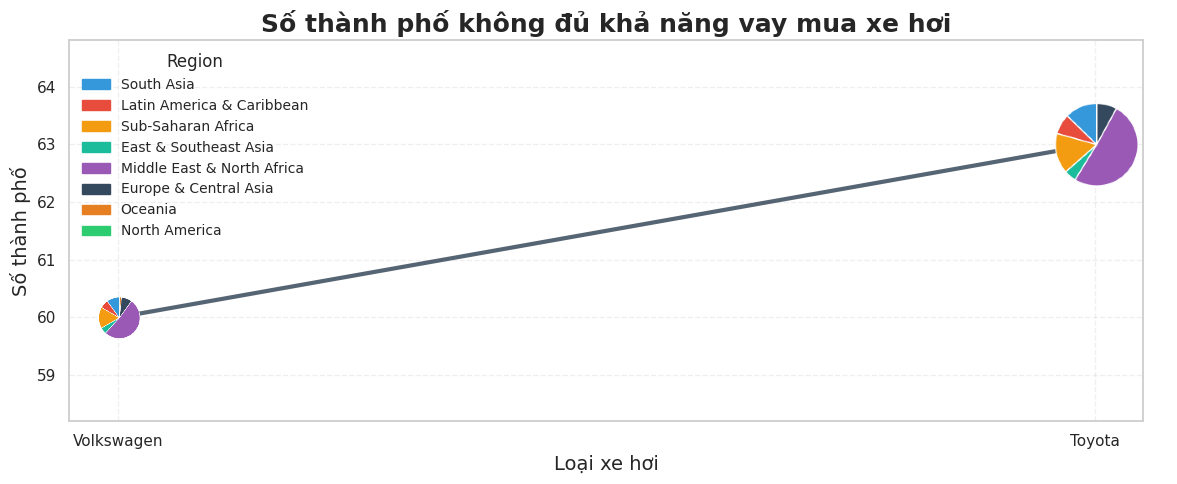

In [359]:
x_labels = ['Volkswagen', 'Toyota']

pie_data = [
    repay_missing['months_to_repay_volkswagen'],
    repay_missing['months_to_repay_toyota'],
]

plot_line_with_pie(x_labels, pie_data, repay_missing, title="Số thành phố không đủ khả năng vay mua xe hơi", xlabel="Loại xe hơi", ylabel="Số thành phố")  # Thay đổi repay_missing theo dữ liệu của bạn

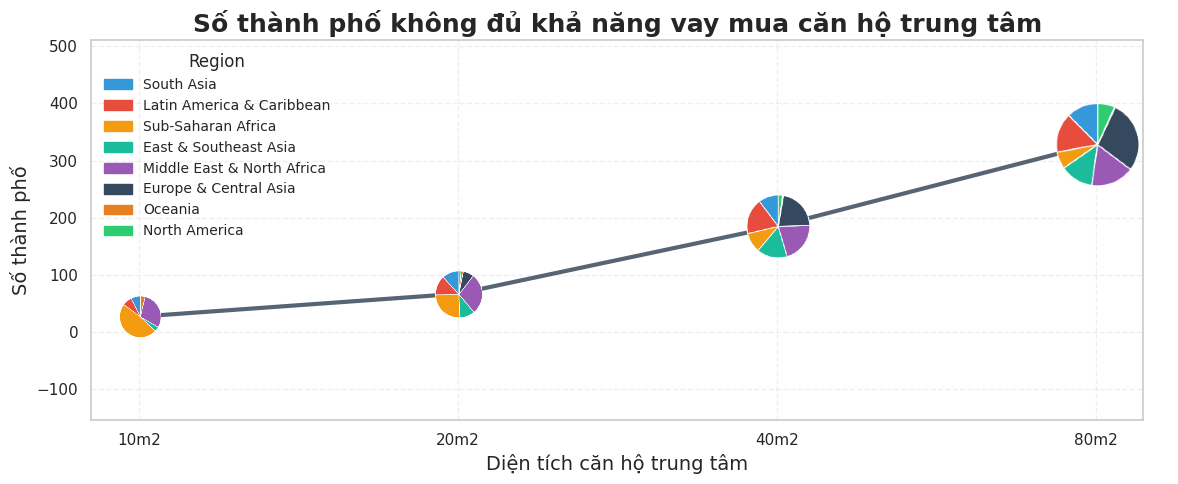

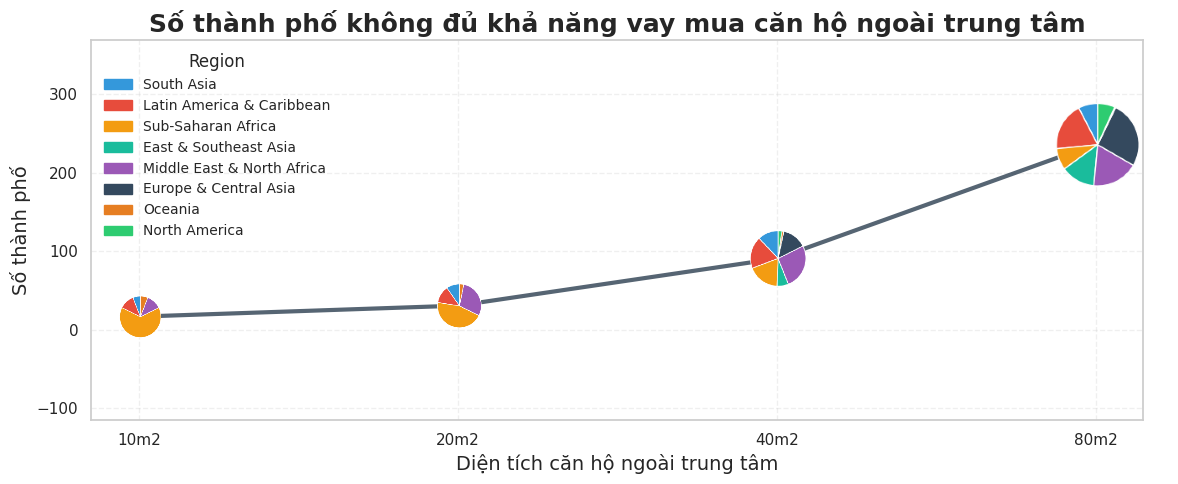

In [360]:
x_labels = ['10m2', '20m2', '40m2', '80m2']

pie_data = [
    repay_missing_10m2['months_to_repay_house_center'],
    repay_missing_20m2['months_to_repay_house_center'],
    repay_missing_40m2['months_to_repay_house_center'],
    repay_missing_80m2['months_to_repay_house_center'],
]

plot_line_with_pie(x_labels, pie_data, repay_missing, title="Số thành phố không đủ khả năng vay mua căn hộ trung tâm", xlabel="Diện tích căn hộ trung tâm", ylabel="Số thành phố")  # Thay đổi repay_missing theo dữ liệu của bạn

pie_data = [
    repay_missing_10m2['months_to_repay_house_suburb'],
    repay_missing_20m2['months_to_repay_house_suburb'],
    repay_missing_40m2['months_to_repay_house_suburb'],
    repay_missing_80m2['months_to_repay_house_suburb'],
]

plot_line_with_pie(x_labels, pie_data, repay_missing, title="Số thành phố không đủ khả năng vay mua căn hộ ngoài trung tâm", xlabel="Diện tích căn hộ ngoài trung tâm", ylabel="Số thành phố")  # Thay đổi repay_missing theo dữ liệu của bạn

#### Câu 4.2: Cần bao nhiêu tháng lương tối thiểu để người dân có thể sở hữu một căn nhà?

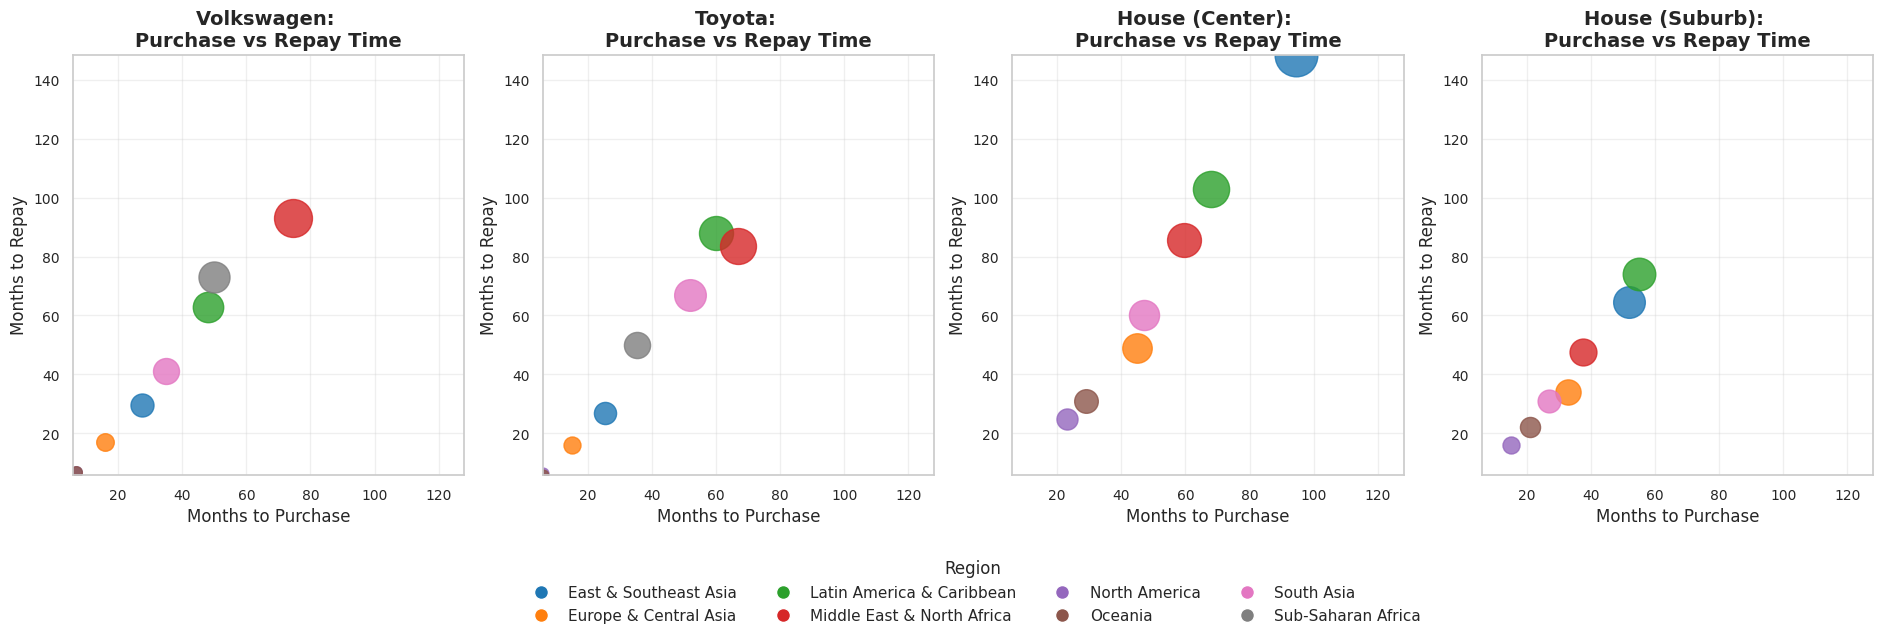

In [361]:
nested_bubble_data = pd.DataFrame({
    "region": df_goals["region"],
    "country": df_goals["country"],
    "purchase_volkswagen": df_goals["months_to_purchase_volkswagen"],
    "repay_volkswagen": df_goals["months_to_repay_volkswagen"].fillna(df_goals["months_to_repay_volkswagen"].max() + 1000000),
    "purchase_toyota": df_goals["months_to_purchase_toyota"],
    "repay_toyota": df_goals["months_to_repay_toyota"].fillna(df_goals["months_to_repay_toyota"].max() + 1000000),
    "purchase_house_center": df_goals["months_to_purchase_house_center"],
    "repay_house_center": df_goals["months_to_repay_house_center"].fillna(df_goals["months_to_repay_house_center"].max() + 1000000),
    "purchase_house_suburb": df_goals["months_to_purchase_house_suburb"],
    "repay_house_suburb": df_goals["months_to_repay_house_suburb"].fillna(df_goals["months_to_repay_house_suburb"].max() + 1000000)
})

# Tính trung bình theo vùng
nested_bubble_grouped = nested_bubble_data.drop('country', axis=1).astype({'region': 'str'}).groupby("region", observed=False).median().reset_index()

# Tính ngưỡng 95% cho cả các cột purchase_* và repay_*
thresholds_purchase = nested_bubble_grouped[[
    # "purchase_volkswagen", "purchase_toyota", 
    "purchase_house_center", "purchase_house_suburb"
]].quantile(1)

thresholds_repay = nested_bubble_grouped[[
    # "repay_volkswagen", "repay_toyota", 
    "repay_house_center", "repay_house_suburb"
]].quantile(0.95)

# Lọc dữ liệu, giữ lại các giá trị nhỏ hơn ngưỡng; chuyển giá trị vượt ngưỡng thành NaN
filtered_bubble_grouped = nested_bubble_grouped.copy()

# for col in ["purchase_volkswagen", "purchase_toyota", "purchase_house_center", "purchase_house_suburb"]:
for col in ["purchase_house_center", "purchase_house_suburb"]:
    filtered_bubble_grouped[col] = np.where(
        filtered_bubble_grouped[col] <= thresholds_purchase[col], 
        filtered_bubble_grouped[col], 
        np.nan
    )

# for col in ["repay_volkswagen", "repay_toyota", "repay_house_center", "repay_house_suburb"]:
for col in ["repay_house_center", "repay_house_suburb"]:
    filtered_bubble_grouped[col] = np.where(
        filtered_bubble_grouped[col] <= thresholds_repay[col], 
        filtered_bubble_grouped[col], 
        np.nan
    )

# Tính lại giới hạn x và y từ dữ liệu đã lọc
x_min = filtered_bubble_grouped[["purchase_volkswagen", "purchase_toyota", "purchase_house_center", "purchase_house_suburb"]].min().min()
x_max = filtered_bubble_grouped[["purchase_volkswagen", "purchase_toyota", "purchase_house_center", "purchase_house_suburb"]].max().max()
y_min = filtered_bubble_grouped[["repay_volkswagen", "repay_toyota", "repay_house_center", "repay_house_suburb"]].min().min()
y_max = filtered_bubble_grouped[["repay_volkswagen", "repay_toyota", "repay_house_center", "repay_house_suburb"]].max().max()

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(1, 4, figure=fig, wspace=0.2)

pairs = [
    ("purchase_volkswagen", "repay_volkswagen", "Volkswagen"),
    ("purchase_toyota", "repay_toyota", "Toyota"),
    ("purchase_house_center", "repay_house_center", "House (Center)"),
    ("purchase_house_suburb", "repay_house_suburb", "House (Suburb)")
]

regions = filtered_bubble_grouped["region"].unique()
colors = sns.color_palette("tab10", len(regions))
region_color_map = dict(zip(regions, colors))

for idx, (purchase_col, repay_col, label) in enumerate(pairs):
    ax = fig.add_subplot(gs[0, idx])
    for region in filtered_bubble_grouped["region"]:
        row = filtered_bubble_grouped[filtered_bubble_grouped["region"] == region]
        
        # Bỏ qua khu vực nếu không có giá trị hợp lệ
        if row[purchase_col].notna().sum() == 0 or row[repay_col].notna().sum() == 0:
            continue

        # Vẽ scatter cho các giá trị hợp lệ
        ax.scatter(
            row[purchase_col], row[repay_col],
            s=row[purchase_col] * 10,
            color=region_color_map[region], alpha=0.8, label=region
        )
    # Đặt giới hạn trục chung
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_title(f"{label}: \nPurchase vs Repay Time", fontsize=14, fontweight="bold")
    ax.set_xlabel("Months to Purchase", fontsize=12)
    ax.set_ylabel("Months to Repay", fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', labelsize=10)

# Tạo chú thích
handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w', label=region,
        markerfacecolor=region_color_map[region], markersize=10
    ) for region in regions if filtered_bubble_grouped[filtered_bubble_grouped["region"] == region].any(axis=None)
]
fig.legend(
    handles=handles, loc="lower center", ncol=4,
    title="Region", bbox_to_anchor=(0.5, -0.12), frameon=False
)

fig.subplots_adjust(top=0.85, bottom=0.15, left=0.05, right=0.95, hspace=0.4, wspace=0.3)
plt.show()


In [345]:
# repay_missing = df_goals[repay_cols].isna().groupby(df_goals['country']).sum().reset_index()
# repay_missing[repay_missing['country'] == 'Taiwan']
# df_processed[df_processed['region'] == 'Sub-Saharan Africa']
# nested_bubble_grouped[nested_bubble_grouped['region'] == 'Sub-Saharan Africa']
# df_goals[df_goals['city'] == 'Ho Chi Minh City']

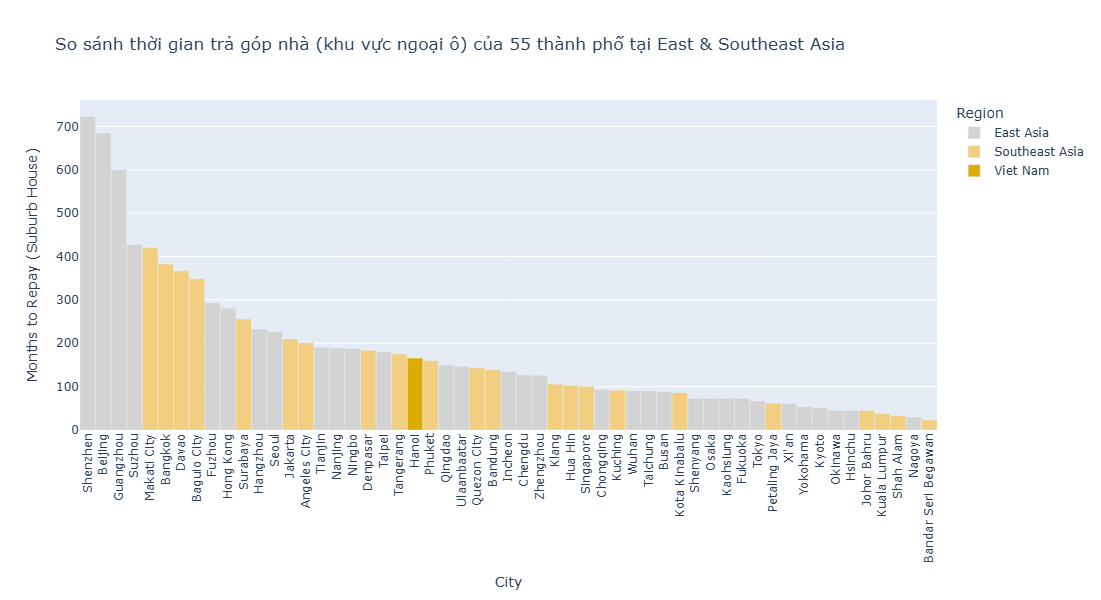

In [364]:
# Khởi tạo cột giá trị cho biểu đồ
region_name = 'East & Southeast Asia'
repay_col = 'months_to_repay_house_center'

# Tạo bản sao của DataFrame với khu vực được chọn
city_repay = df_goals[df_goals['region'] == region_name].copy()

# Lọc các thành phố có dữ liệu không phải NaN trong cột cần hiển thị
city_repay = city_repay[city_repay[repay_col].notna()] 

# Phân loại thành khu vực con
east_asia_countries = ['China', 'Japan', 'South Korea', 'North Korea', 'Mongolia', 'Taiwan', 'Hong Kong', 'Macau']
southeast_asia_countries = ['Vietnam', 'Thailand', 'Malaysia', 'Indonesia', 'Philippines', 'Singapore', 'Myanmar', 'Cambodia', 'Laos', 'Brunei', 'Timor-Leste']

city_repay['sub_region'] = city_repay['country'].apply(
    lambda x: 'East Asia' if x in east_asia_countries else
              'Southeast Asia' if x in southeast_asia_countries else
              'Other'
)

# Tạo cột màu sắc theo quy tắc
city_repay['Region'] = city_repay.apply(
    lambda row: 'Viet Nam' if row['country'] == 'Vietnam' else
                'East Asia' if row['sub_region'] == 'East Asia' else
                'Southeast Asia',
    axis=1
)

# Sắp xếp theo giá trị `months_to_repay_house_suburb` giảm dần
city_repay = city_repay.sort_values(by=repay_col, ascending=False)

# Đảm bảo chỉ hiển thị tối đa 30 city labels
total_cities = len(city_repay)
step = max(total_cities // 30, 1)  # Chọn số lượng nhãn cần hiển thị

# Cập nhật trục X sao cho chỉ có tối đa 30 nhãn
labels_to_show = city_repay['city'].iloc[::step].tolist()

# Đảm bảo thứ tự trục x trên biểu đồ tuân theo thứ tự trong DataFrame
fig = px.bar(city_repay,
             x='city',
             y=repay_col,  # Cột giá trị cần hiển thị
             title=f'So sánh thời gian trả góp nhà (khu vực ngoại ô) của {total_cities} thành phố tại {region_name}',
             labels={'city': 'City', repay_col: 'Months to Repay (Suburb House)'},
             color='Region',  # Sử dụng màu đã tạo
             color_discrete_map={
                 'Viet Nam': '#dcab04',     
                 'East Asia': '#D3D3D3',     
                 'Southeast Asia': '#F2CE80'
             },
             category_orders={'city': city_repay['city'].tolist()}  # Đặt thứ tự trục x
)

# Cập nhật nhãn trục X để chỉ hiển thị một số nhãn nhất định
fig.update_layout(
    xaxis_tickangle=-90,  # Xoay nhãn trục X cho dễ đọc
    xaxis_tickvals=city_repay['city'].iloc[::step],  # Hiển thị nhãn cho các thành phố đã chọn
    height=600,  # Điều chỉnh chiều cao
    width=1100,  # Điều chỉnh chiều rộng
    showlegend=True,
    bargap=0.001,  # Giảm khoảng cách giữa các cột
    
    dragmode=False,  # Tắt chế độ zoom và pan
    hovermode=False  # Tắt chế độ hover
)

fig.show()

## <strong>Câu hỏi 4:</strong> (Sẽ làm sau, do lằng nhằng với các câu trên)

Top 10 thành phố có chi phí sinh hoạt (tham khảo COLI) cao nhất và thấp nhất trên thế giới, theo từng khu vực/châu lục là những thành phố nào? (Tuy nhiên, câu này có thể được tích hợp ở 2 câu trên)



#### Giá trị có thể đạt được:

#### Ý tưởng thực hiện:

## <strong>Câu hỏi 5:</strong> (Sẽ soạn sau)

#### Giá trị có thể đạt được:

#### Ý tưởng thực hiện:

Câu hỏi nên mang tính chất tổng quát theo Quy mô (khuyến nghị): Theo 8 vùng và Bắc bán cầu/Nam bán cầu ĐỂ THẤY ĐƯỢC INSIGHT TỔNG QUÁT NHẤT

# <strong>D. Đánh giá quá trình làm việc, định hướng phát triển - Danh mục Tài liệu tham khảo</strong>